In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:16
🔁 Restarting kernel...


In [2]:
import torch

def format_pytorch_version(version):
    return version.split('+')[0]

TORCH_version = torch.__version__
TORCH = format_pytorch_version(TORCH_version)

def format_cuda_version(version):
    return 'cu' + version.replace('.', '')

CUDA_version = torch.version.cuda
CUDA = format_cuda_version(CUDA_version)

!pip install torch-scatter -f https://data.pyg.org/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-spline-conv -f https://data.pyg.org/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-geometric

Looking in links: https://data.pyg.org/whl/torch-2.2.1+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 61.9 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.2.1+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 54.3 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.2.1+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 8.2 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.2.1+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 943.4/943.4 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━

In [1]:
!conda install -c conda-forge rdkit

Channels:
 - conda-forge
Platform: linux-64
Solving environment: | / - \ | / done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - rdkit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotli-1.1.0               |       hd590300_1          19 KB  conda-forge
    brotli-bin-1.1.0           |       hd590300_1          19 KB  conda-forge
    ca-certificates-2024.2.2   |       hbcca054_0         152 KB  conda-forge
    cairo-1.18.0               |       h3faef2a_0         959 KB  conda-forge
    certifi-2024.2.2           |     pyhd8ed1ab_0         157 KB  conda-forge
    chardet-5.2.0              |  py310hff52083_1         241 KB  conda-forge
    con

In [2]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.5/705.5 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 4.2 MB/s eta 0:00:00


In [3]:
import networkx as nx

import torch
from torch import nn
import torch.nn.functional as F
from torch_scatter import scatter

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from rdkit import Chem
from rdkit.Chem.Draw import MolToImage
from rdkit.Chem.rdmolfiles import MolToSmiles

import itertools as it

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

import requests
import io
import os
import pickle
import json
import shutil

import optuna
from sklearn.model_selection import train_test_split

In [4]:
BBBP_URL = "https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/BBBP.csv"
res = requests.get(BBBP_URL)
fp = io.StringIO(res.content.decode('utf-8'))
df = pd.read_csv(fp)
fp.close()

"""
path_to_csv = 'BBBP.csv'
df = pd.read_csv(path_to_csv)
"""

p_np_init = df['p_np'].tolist()
smiles_init = df['smiles'].tolist()

p_np = []
smiles = []
molecules = []

for i, s in enumerate(smiles_init):
    mol = Chem.MolFromSmiles(s)
    if mol is not None:
        molecules.append(mol)
        p_np.append(p_np_init[i])
        smiles.append(s)

[22:36:40] Explicit valence for atom # 1 N, 4, is greater than permitted
[22:36:40] WARNING: not removing hydrogen atom without neighbors
[22:36:40] Explicit valence for atom # 6 N, 4, is greater than permitted
[22:36:40] WARNING: not removing hydrogen atom without neighbors
[22:36:40] WARNING: not removing hydrogen atom without neighbors
[22:36:40] WARNING: not removing hydrogen atom without neighbors
[22:36:40] WARNING: not removing hydrogen atom without neighbors
[22:36:40] WARNING: not removing hydrogen atom without neighbors
[22:36:40] WARNING: not removing hydrogen atom without neighbors
[22:36:40] Explicit valence for atom # 6 N, 4, is greater than permitted
[22:36:40] WARNING: not removing hydrogen atom without neighbors
[22:36:40] WARNING: not removing hydrogen atom without neighbors
[22:36:41] WARNING: not removing hydrogen atom without neighbors
[22:36:41] WARNING: not removing hydrogen atom without neighbors
[22:36:41] Explicit valence for atom # 11 N, 4, is greater than pe

In [ ]:
indices = np.arange(len(molecules))

In [5]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [6]:
class NDFeaturizer:
    atom_feature_names = (
        'number',
        'degree',
        'charge',
        'num_h',
        'hybrid',
        'aromatic'
    )

    bond_feature_names = (
        'bondtype',
        'conjug',
        'isinring'
    )

    atom_methods = (
        Chem.Atom.GetAtomicNum,
        Chem.Atom.GetDegree,
        Chem.Atom.GetFormalCharge,
        Chem.Atom.GetTotalNumHs,
        Chem.Atom.GetHybridization,
        Chem.Atom.GetIsAromatic
    )

    bond_methods = (
        Chem.Bond.GetBondType,
        Chem.Bond.GetIsConjugated,
        Chem.Bond.IsInRing
    )

    def __init__(self, molecules, other_threshold, n_eyes=2):
        n_mol = len(molecules)
        self.threshold = int(n_mol * other_threshold)
        f_count = self.__class__.feature_count(molecules)
        self.mappings = {}
        self.add_mappings(self.__class__.atom_feature_names, f_count)
        self.add_mappings(self.__class__.bond_feature_names, f_count)
        self.atom_dim = self.mappings[self.__class__.atom_feature_names[-1]]('default') + 1
        self.bond_dim = self.mappings[self.__class__.bond_feature_names[-1]]('default') + 1
        self.n_eyes = n_eyes

    def add_mappings(self, names, f_count):
        i = -1
        for name in names:
            i += 1
            d = f_count[name]
            filtered = {}
            for key, val in d.items():
                if val >= self.threshold:
                    filtered[key] = i
                    i += 1
            self.mappings[name] = self.__class__.make_mapping(filtered, i)

    def atom_tensor(self, atom):
        ret = torch.zeros(self.atom_dim)
        for key, method in zip(
            self.__class__.atom_feature_names,
            self.__class__.atom_methods
        ):
            ret[self.mappings[key](method(atom))] = 1.0
        return ret

    def bond_tensor(self, bond):
        ret = torch.zeros(self.bond_dim)
        for key, method in zip(
            self.__class__.bond_feature_names,
            self.__class__.bond_methods
        ):
            ret[self.mappings[key](method(bond))] = 1.0
        return ret

    def featurize(self, molecules):
        featurized = []
        for mol in molecules:
            featurized.append(self.mol_to_nd_input(mol))
        return featurized

    def mol_to_nd_input(self, mol):
        g = nx.Graph()
        a_list = []
        for i, atom in enumerate(mol.GetAtoms()):
            g.add_node(i)
            a_list.append(self.atom_tensor(atom).view(1, -1))
        for bond in mol.GetBonds():
            g.add_edge(
                bond.GetBeginAtomIdx(),
                bond.GetEndAtomIdx())
        a = torch.cat(a_list, dim=0)
        # print(a)
        ret = [a,]
        if self.n_eyes > 1:
            cp_idxs = self.__class__.get_connected_pairs(g)
            cp_list = []
            for cp_idx in cp_idxs:
                cp_list.append(a[cp_idx].view(1, -1))
                cp_list.append(a[cp_idx[::-1]].view(1, -1))
            cp = torch.cat(cp_list, dim=0)
            ret.append(cp)
        if self.n_eyes > 2:
            ct_idxs = self.__class__.get_connected_triads(g)
            ct_list = []
            for ct_idx in ct_idxs:
                for perm in it.permutations(ct_idx, 3):
                    ct_list.append(a[ct_idx].view(1, -1))
            if len(ct_list) == 0:
                ct = torch.empty((0, self.atom_dim*3))
            else:
                ct = torch.cat(ct_list, dim=0)
            ret.append(ct)
        return tuple(ret)

    @classmethod
    def get_connected_pairs(cls, g):
        ret = []
        for node in g.nodes():
            for neighbor in g.neighbors(node):
                if node < neighbor:
                    ret.append([node, neighbor])
        return ret

    @classmethod
    def get_connected_triads(cls, g):
        ret = []
        for node in g.nodes():
            neighbors = [x for x in g.neighbors(node)]
            if len(neighbors) < 2:
                continue
            for pair in it.combinations(neighbors, 2):
                ret.append([pair[0], node, pair[1]])
        return ret

    @classmethod
    def feature_count(cls, molecules):
        ret = {name: {} for name in cls.atom_feature_names + cls.bond_feature_names}
        for mol in molecules:
            features = cls.mol_features(mol)
            for key, val in features.items():
                for x in val:
                    if x not in ret[key]:
                        ret[key][x] = 1
                    else:
                        ret[key][x] += 1
        for name in ret:
            ret[name] = dict(sorted(ret[name].items()))
        return ret

    @classmethod
    def mol_features(cls, mol):
        ret = {name: [] for name in cls.atom_feature_names + cls.bond_feature_names}
        for atom in mol.GetAtoms():
            for key, method in zip(
                cls.atom_feature_names, cls.atom_methods
            ):
                val = method(atom)
                if val not in ret[key]:
                    ret[key].append(val)
        for bond in mol.GetBonds():
            for key, method in zip(
                cls.bond_feature_names, cls.bond_methods
            ):
                val = method(bond)
                if val not in ret[key]:
                    ret[key].append(val)
        return ret

    @staticmethod
    def make_mapping(d, default=0):
        dcopy = d.copy()
        return lambda x: dcopy[x] if x in dcopy.keys() else default

In [7]:
featurizer = NDFeaturizer(molecules, other_threshold=0.01, n_eyes=3)

In [8]:
input_data = featurizer.featurize(molecules)

In [12]:
def train_val(data, ys, fold=5, random_state=42):
    assert len(data) == len(ys), f'len(data): {len(data)}, len(ys): {len(ys)}'

    indices = np.arange(len(data))
    skf = StratifiedKFold(n_splits=fold, shuffle=True, random_state=random_state)

    for train_indices, val_indices in skf.split(indices, ys):
        train_data = []
        train_ys = []
        val_data = []
        val_ys = []

        for idx in train_indices:
            train_data.append(data[idx])
            train_ys.append(ys[idx])
        for idx in val_indices:
            val_data.append(data[idx])
            val_ys.append(ys[idx])

        yield (train_data, train_ys), (val_data, val_ys), train_indices, val_indices

In [9]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [10]:
class NeuralDevice(nn.Module):
    def __init__(self, eyes_dict, brain_nfs):
        super().__init__()

        self.eye_names = list(eyes_dict.keys())

        for eye_name, eye_hparams in eyes_dict.items():
            self.add_module(eye_name, NDEye(*eye_hparams))

        self.brain = NDBrain(*brain_nfs)

    def forward(self, x, batch_indices):
        eyes_outputs = []
        maxlen = max(batch_indices[0]) + 1
        for i, name in enumerate(self.eye_names):
            eye_output = self.get_submodule(name)(x[i], torch.tensor(batch_indices[i], device=device))
            L = eye_output.shape[0]
            if L < maxlen:
                nf = eye_output.shape[1]
                eye_output = torch.cat((eye_output, torch.zeros((maxlen - L, nf), device=device)), dim=0)
            eyes_outputs.append(eye_output)
        return self.brain(torch.cat(eyes_outputs, dim=1))

class NDEye(nn.Module):
    def __init__(self, r_in_nf, r_out_nf, c_out_nf):
        super().__init__()
        self.r_linear = nn.Linear(r_in_nf, r_out_nf) # receptor
        self.c_linear = nn.Linear(r_out_nf, c_out_nf) # collector

    def forward(self, x, batch_index):
        x = F.relu(self.r_linear(x))
        x = F.relu(self.c_linear(scatter(x, batch_index, dim=0, reduce='mean')))
        return x

class NDBrain(nn.Module):
    def __init__(self, in_nf, h_nf, out_nf):
        super().__init__()
        self.linear_1 = nn.Linear(in_nf, h_nf)
        self.linear_2 = nn.Linear(h_nf, out_nf) #, bias=False)

    def forward(self, x):
        x = F.relu(self.linear_1(x))
        x = self.linear_2(x)
        return x

In [11]:
def get_batches(data, ys, batch_size, shuffle=True):
    N = len(data)
    K = len(data[0])
    eye_nfs = tuple(x.size()[1] for x in data[0])
    if shuffle:
        indices = np.random.permutation(N)
    else:
        indices = np.arange(N)
    for i in range(0, N, batch_size):
        eye_inputs = [list() for k in range(K)]
        batch_indices = [list() for k in range(K)]
        targets = []
        curr_indices = indices[i:i+batch_size]
        for idx, j in enumerate(curr_indices):
            targets.append(ys[j])
            for k in range(K):
                eye_inputs[k].append(data[j][k])
                batch_indices[k].extend([idx,]*data[j][k].shape[0])
        yield tuple(torch.cat(eye_inputs[k], dim=0).to(device) for k in range(K)), batch_indices, torch.tensor(targets, device=device)

In [13]:
class CheckPointer:

    def __init__(self, model, hparams, parent_folder,
                 model_name, train_indices, test_indices):
        self.model = model
        self.hparams = hparams
        self.model_name = model_name
        self.curr_checkpoint = 0

        self.folder = os.path.join(parent_folder, model_name)
        os.mkdir(self.folder)

        with open(os.path.join(parent_folder, 'hparams.pkl'), 'wb') as fp:
            pickle.dump(hparams, fp)

        with open(os.path.join(self.folder, 'split_info.pkl'), 'wb') as fp:
            pickle.dump({
                'train_indices': train_indices,
                'test_indices': test_indices
            }, fp)

    def new_checkpoint(self, data):
        assert 'model.state_dict' in data
        file_path = os.path.join(self.folder, f'{self.curr_checkpoint:04d}.pt')
        torch.save(data, file_path)
        self.curr_checkpoint += 1

    def load_checkpoint(self, filename):
        file_path = os.path.join(self.folder, filename)
        data = torch.load(file_path)
        state_dict = data['model.state_dict']
        return data, self.model.__class__(**self.hparams).load_state_dict(state_dict)

In [14]:
def cross_validate(
        model_class,
        hparams,
        data,
        ys,
        batch_size,
        cv_fold,
        max_n_epoch,
        overfit_threshold,
        opt_class,
        opt_kwargs,
        loss_func,
        scheduler_patience,
        scheduler_factor,
        name
):

    os.mkdir(name)

    for cv_idx, cv in enumerate(train_val(data, ys)):

        print(f'\nCross-validation run #{cv_idx+1}\n')

        train_list, train_ys = cv[0]
        val_list, val_ys = cv[1]
        train_indices, val_indices = cv[2:4]

        train_losses = [1e310,]
        val_losses = [1e310,]

        overfit_c = 0

        model = model_class(**hparams).to(device)

        opt = opt_class(model.parameters(), **opt_kwargs)
        sch = torch.optim.lr_scheduler.ReduceLROnPlateau(
            optimizer=opt,
            factor=scheduler_factor,
            patience=scheduler_patience
        )

        cptr = CheckPointer(model, hparams, name, f'cv_{cv_idx+1}',
                            train_indices, val_indices)

        for i in range(max_n_epoch):

            c_train_loss = 0.0
            c_val_loss = 0.0

            model.train()
            for X, batch_indices, y in get_batches(train_list, train_ys, batch_size): #
                pred = model(X, batch_indices)
                loss = loss_func(pred, y)
                loss.backward()
                opt.step()
                opt.zero_grad()
                c_train_loss += loss.item() * y.size()[0]

            model.eval()
            for X, batch_indices, y in get_batches(val_list, val_ys, batch_size, shuffle=False):
                pred = model(X, batch_indices)
                loss = loss_func(pred, y)
                c_val_loss += loss.item() * y.size()[0]

            avg_train_loss = c_train_loss / len(train_list)
            avg_val_loss = c_val_loss / len(val_list)

            print(f'epoch: {i+1}')
            print(f'    average train loss:\t{round(avg_train_loss, 3)}')
            print(f'    average val loss:\t{round(avg_val_loss, 3)}')

            # print(f'min(val_losses): {min(val_losses)}')

            if avg_val_loss < min(val_losses):
                overfit_c = 0
                cp_data = {
                    'model.state_dict': model.state_dict(),
                    'opt.state_dict': opt.state_dict(),
                    'epoch': i,
                    'train_loss': avg_train_loss,
                    'val_loss': avg_val_loss,
                    'fitness': 'underfit',
                }
                print(f'        saving checkpoint...')
                best_model_info = {
                    'file_name': f'{cptr.curr_checkpoint:04d}.pt',
                    'train_loss': avg_train_loss,
                    'val_loss': avg_val_loss,
                }
                cptr.new_checkpoint(cp_data)

            # elif avg_train_loss < min(train_losses):
            #    overfit_c += 1
            else:
                overfit_c += 1

            train_losses.append(avg_train_loss)
            val_losses.append(avg_val_loss)

            if overfit_c >= overfit_threshold:
                cp_data = {
                    'model.state_dict': model.state_dict(),
                    'opt.state_dict': opt.state_dict(),
                    'epoch': i,
                    'train_loss': avg_train_loss,
                    'val_loss': avg_val_loss,
                    'fitness': 'overfit',
                }
                print(f'        model overfitted! saving checkpoint and stopping learning...')
                cptr.new_checkpoint(cp_data)

                with open(os.path.join(cptr.folder, 'best_model_info'), 'w') as fp:
                    json.dump(best_model_info, fp)

                break

            sch.step(avg_val_loss)

        else:
            cp_data = {
                'model.state_dict': model.state_dict(),
                'opt.state_dict': opt.state_dict(),
                'epoch': i,
                'train_loss': avg_train_loss,
                'val_loss': avg_val_loss,
                'fitness': 'underfit',
            }
            print('        no more epochs! saving checkpoint and stopping learning...')
            cptr.new_checkpoint(cp_data)

            with open(os.path.join(cptr.folder, 'best_model_info'), 'w') as fp:
                    json.dump(best_model_info, fp)

In [23]:
# params={'atom_h': 36, 'pair_h': 72, 'triad_h': 112, 'brain_h': 224, 'atom_o': 14, 'pair_o': 36, 'triad_o': 72}
"""
hparams = {
    'eyes_dict': {
        'atoms': (32, 32, 16),
        'pairs': (64, 64, 32),
        'triads': (96, 96, 48),
    },
    'brain_nfs': (96, 256, 2)
}
"""
hparams = {
    'eyes_dict': {
        'atoms': (32, 36, 14),
        'pairs': (64, 72, 36),
        'triads': (96, 112, 72),
    },
    'brain_nfs': (122, 224, 2)
}

cross_validate(
    model_class=NeuralDevice,
    hparams=hparams,
    data=input_data,
    ys=p_np,
    batch_size=32,
    cv_fold=5,
    max_n_epoch=1000,
    overfit_threshold=20,
    opt_class=torch.optim.SGD,
    opt_kwargs={'lr': 0.05},
    loss_func=nn.CrossEntropyLoss(),
    scheduler_patience=10,
    scheduler_factor=0.25,
    name='NeuralDevice_BBBP_CV5'
)


Cross-validation run #1

epoch: 1
    average train loss:	0.576
    average val loss:	0.545
        saving checkpoint...
epoch: 2
    average train loss:	0.544
    average val loss:	0.544
        saving checkpoint...
epoch: 3
    average train loss:	0.543
    average val loss:	0.543
        saving checkpoint...
epoch: 4
    average train loss:	0.542
    average val loss:	0.541
        saving checkpoint...
epoch: 5
    average train loss:	0.54
    average val loss:	0.54
        saving checkpoint...
epoch: 6
    average train loss:	0.538
    average val loss:	0.538
        saving checkpoint...
epoch: 7
    average train loss:	0.536
    average val loss:	0.535
        saving checkpoint...
epoch: 8
    average train loss:	0.533
    average val loss:	0.531
        saving checkpoint...
epoch: 9
    average train loss:	0.528
    average val loss:	0.526
        saving checkpoint...
epoch: 10
    average train loss:	0.522
    average val loss:	0.52
        saving checkpoint...
epoch: 11
    av

In [ ]:
# !rm -r /content/NeuralDevice_BBBP_CV5

In [ ]:
def copy_only_best_models(checkpoints_folder, best_models_folder):
    folder = checkpoints_folder
    best_folder = best_models_folder

    if not (os.path.exists(best_folder) and os.path.isdir(best_folder)):
        os.mkdir(best_folder)

    shutil.copyfile(
        os.path.join(folder, 'hparams.pkl'),
        os.path.join(best_folder, 'hparams.pkl'))

    for dirname in os.listdir(folder):
        dirpath = os.path.join(folder, dirname)
        if not os.path.isdir(dirpath):
            continue

        curr_best_folder = os.path.join(best_folder, dirname)
        os.mkdir(curr_best_folder)

        split_info_path = os.path.join(dirpath, 'split_info.pkl')
        bm_info_path = os.path.join(dirpath, 'best_model_info')
        with open(bm_info_path) as fp:
            best_model_info = json.load(fp)

        best_model_path = os.path.join(dirpath, best_model_info['file_name'])

        shutil.copyfile(bm_info_path, os.path.join(curr_best_folder, 'best_model_info.json'))
        shutil.copyfile(best_model_path, os.path.join(curr_best_folder, best_model_info['file_name']))
        shutil.copyfile(split_info_path, os.path.join(curr_best_folder, 'split_info.pkl'))

In [ ]:
checkpoints_folder = '/content/NeuralDevice_BBBP_CV5'
best_models_folder = '/content/NeuralDevice_BBBP_CV5_best'

In [ ]:
copy_only_best_models('/content/NeuralDevice_BBBP_CV5', '/content/NeuralDevice_BBBP_CV5_best')

In [ ]:
def evaluate_model(model, val_list, val_ys, batch_size):
    model.eval()
    preds = []
    targets = []
    for X, batch_indices, y in get_batches(val_list, val_ys, batch_size, shuffle=False):
        pred = model(X, batch_indices)
        preds.extend(F.softmax(pred, dim=1)[:,1].tolist())
        targets.extend(y.tolist())
    return roc_auc_score(targets, preds)

In [ ]:
shutil.make_archive('NeuralDevice_BBBP_CV5_best', 'zip', 'NeuralDevice_BBBP_CV5_best')

'/content/NeuralDevice_BBBP_CV5_best.zip'

In [ ]:
def load_model(model_class, hparams, checkpoint_file):
    model = model_class(**hparams).to(device)
    state_dict = torch.load(checkpoint_file)['model.state_dict']
    model.load_state_dict(state_dict)
    return model

In [ ]:
def get_best_models_and_split_info(model_class, best_models_folder):
    hparams_path = os.path.join(best_models_folder, 'hparams.pkl')
    with open(hparams_path, 'rb') as fp:
        hparams = pickle.load(fp)
    for dirname in os.listdir(best_models_folder):
        dirpath = os.path.join(best_models_folder, dirname)
        if not os.path.isdir(dirpath):
            continue
        for filename in os.listdir(dirpath):
            if os.path.splitext(filename)[1] == '.pt':
                filepath = os.path.join(dirpath, filename)
                model = load_model(model_class, hparams, filepath)
            if filename == 'split_info.pkl':
                filepath = os.path.join(dirpath, filename)
                with open(filepath, 'rb') as fp:
                    split_info = pickle.load(fp)
            else:
                continue
        yield model, split_info

In [ ]:
best_models, split_infos = [], []

In [ ]:
for bm, si in get_best_models_and_split_info(NeuralDevice, '/content/NeuralDevice_BBBP_CV5_best'):
    best_models.append(bm)
    split_infos.append(si)

In [ ]:
len(best_models)

5

In [ ]:
len(split_infos)

5

In [ ]:
scores = []
for i in range(5):
    model = best_models[i]
    val_indices = split_infos[i]['test_indices']

    val_list = []
    val_ys = []

    for idx in val_indices:
        val_list.append(input_data[idx])
        val_ys.append(p_np[idx])

    score = evaluate_model(model, val_list, val_ys, 32)
    scores.append(score)
    print(f'model: {i+1}, roc_auc: {score}')


model: 1, roc_auc: 0.936268556005398
model: 2, roc_auc: 0.9157652243589745
model: 3, roc_auc: 0.9389356303418804
model: 4, roc_auc: 0.9366820245726497
model: 5, roc_auc: 0.9219083867521368


In [ ]:
split_infos[0]

In [ ]:
np.mean(scores)

0.9299119644062079

In [ ]:
np.std(scores)*3

0.021986491879721303

In [ ]:
mom_smiles = 'c1(C2NC(=O)C(O)(C(F)(F)F)C=2C(=O)O3)c3cccc1'
mom_mol = Chem.MolFromSmiles(mom_smiles)

In [ ]:
mom_feat = featurizer.featurize([mom_mol,])

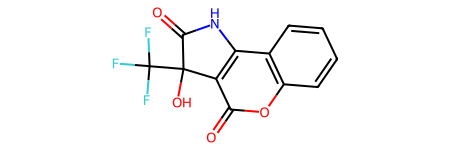

In [ ]:
mom_mol

In [ ]:
batch_index = tuple(torch.zeros(len(mom_feat[0][i]), dtype=torch.int64) for i in range(3))
F.softmax(best_models[](mom_feat[0], batch_index), dim=1)

<ipython-input-41-29ecb1fdad92>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  eye_output = self.get_submodule(name)(x[i], torch.tensor(batch_indices[i]))


tensor([[0.2384, 0.7616]], grad_fn=<SoftmaxBackward0>)

In [ ]:
mom_feat[0]

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.5/705.5 kB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 6.6 MB/s eta 0:00:00


In [ ]:
import optuna

In [ ]:
def objective(trial):
    x = trial.suggest_float('x', -10, 10)
    return x ** 2

In [ ]:
study = optuna.create_study()
study.optimize(objective, n_trials=10)

[I 2024-04-20 13:43:00,242] A new study created in memory with name: no-name-cc3d3714-0fca-4ec9-b503-2642ccafd13c
[I 2024-04-20 13:43:00,250] Trial 0 finished with value: 7.6343287926206544 and parameters: {'x': 2.763028916356225}. Best is trial 0 with value: 7.6343287926206544.
[I 2024-04-20 13:43:00,256] Trial 1 finished with value: 0.4481154709992664 and parameters: {'x': -0.6694142745708866}. Best is trial 1 with value: 0.4481154709992664.
[I 2024-04-20 13:43:00,269] Trial 2 finished with value: 16.57959649351989 and parameters: {'x': -4.07180506575645}. Best is trial 1 with value: 0.4481154709992664.
[I 2024-04-20 13:43:00,279] Trial 3 finished with value: 0.014827175662981393 and parameters: {'x': 0.12176689066811797}. Best is trial 3 with value: 0.014827175662981393.
[I 2024-04-20 13:43:00,284] Trial 4 finished with value: 32.91412152400572 and parameters: {'x': 5.737083015261826}. Best is trial 3 with value: 0.014827175662981393.
[I 2024-04-20 13:43:00,290] Trial 5 finished wit

In [ ]:
import torch

In [ ]:
torch.cuda.is_available()

False

In [ ]:
hparams_selection = {
    'atom_h': (28, 36, 8),
    'pair_h': (56, 72, 16),
    'triad_h': (80, 112, 32),
    'brain_h': (224, 288, 64),
    'atom_o': (14, 22, 8),
    'pair_o': (28, 36, 8),
    'triad_o': (56, 72, 16),
}

In [ ]:
class Objective:
    def __init__(self, hparams_selection, train, val):
        self.hparams_selection = hparams_selection
        self.train = train
        self.val = val

    def __call__(self, trial):

        atom_h = trial.suggest_int('atom_h', *hparams_selection['atom_h'])
        pair_h = trial.suggest_int('pair_h', *hparams_selection['pair_h'])
        triad_h = trial.suggest_int('triad_h', *hparams_selection['triad_h'])
        brain_h = trial.suggest_int('brain_h', *hparams_selection['brain_h'])
        atom_o = trial.suggest_int('atom_o', *hparams_selection['atom_o'])
        pair_o = trial.suggest_int('pair_o', *hparams_selection['pair_o'])
        triad_o = trial.suggest_int('triad_o', *hparams_selection['triad_o'])

        hparams = {
            'eyes_dict': {
            'atoms': (32, atom_h, atom_o),
            'pairs': (64, pair_h, pair_o),
            'triads': (96, triad_h, triad_o),
            },
            'brain_nfs': (atom_o + pair_o + triad_o, brain_h, 2)
        }

        for i, val_loss in enumerate(train_model(
            model_class=NeuralDevice,
            hparams=hparams,
            train_list=self.train[0],
            train_ys=self.train[1],
            val_list=self.val[0],
            val_ys=self.val[1],
            batch_size=96,
            max_n_epoch=1000,
            overfit_threshold=20,
            opt_class=torch.optim.SGD,
            opt_kwargs={'lr': 0.05},
            loss_func=nn.CrossEntropyLoss(),
            scheduler_patience=10,
            scheduler_factor=0.25)):

            trial.report(val_loss, step=i)

            if trial.should_prune():
                print('trial pruned')
                raise optuna.TrialPruned()

        return val_loss


In [ ]:
def train_model(
    model_class,
    hparams,
    train_list,
    train_ys,
    val_list,
    val_ys,
    batch_size,
    max_n_epoch,
    overfit_threshold,
    opt_class,
    opt_kwargs,
    loss_func,
    scheduler_patience,
    scheduler_factor,
    ):

    model = model_class(**hparams).to(device)
    opt = opt_class(model.parameters(), **opt_kwargs)
    sch = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer=opt,
        factor=scheduler_factor,
        patience=scheduler_patience
    )

    train_losses = [1e310,]
    val_losses = [1e310,]

    overfit = False
    overfit_c = 0

    for i in range(max_n_epoch):

        # c_train_loss = 0.0
        c_val_loss = 0.0

        model.train()
        for X, batch_indices, y in get_batches(train_list, train_ys, batch_size): #
            pred = model(X, batch_indices)
            loss = loss_func(pred, y)
            loss.backward()
            opt.step()
            opt.zero_grad()
            # c_train_loss += loss.item() * y.size()[0]

        model.eval()
        for X, batch_indices, y in get_batches(val_list, val_ys, batch_size, shuffle=False):
            pred = model(X, batch_indices)
            loss = loss_func(pred, y)
            c_val_loss += loss.item() * y.size()[0]

        # avg_train_loss = c_train_loss / len(train_list)
        avg_val_loss = c_val_loss / len(val_list)

        if avg_val_loss >= min(val_losses):
            overfit_c += 1
        else:
            overfit_c = 0

        if overfit_c > overfit_threshold:
            overfit = True
            break

        val_losses.append(avg_val_loss)

        if (i + 1) % 10 == 0:
            min_val_loss = min(val_losses)
            print(f'epoch: {i+1}, val_loss: {min_val_loss}')
            yield min_val_loss

    if overfit:
        min_val_loss = min(val_losses)
        for j in range(i, max_n_epoch, 10):
            yield min_val_loss

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
def train_val_test(data, ys, test_size=0.2, random_state=42):
    assert len(data) == len(ys), f'len(data): {len(data)}, len(ys): {len(ys)}'
    indices = np.arange(len(data))

    train_val_indices, test_indices, train_val_ys, test_ys = train_test_split(
        indices, ys, test_size=test_size,
        stratify=ys, random_state=random_state)

    train_indices, val_indices, train_ys, val_ys = train_test_split(
        train_val_indices, train_val_ys, test_size=test_size,
        stratify=train_val_ys, random_state=random_state)

    train_data = [data[idx] for idx in train_indices]
    val_data = [data[idx] for idx in val_indices]
    test_data = [data[idx] for idx in test_indices]

    return (train_data, train_ys), (val_data, val_ys), (test_data, test_ys)

In [ ]:
(train_list, train_ys), (val_list, val_ys), _ = train_val_test(input_data, p_np)

In [ ]:
objective = Objective(
    hparams_selection=hparams_selection,
    train=(train_list, train_ys),
    val=(val_list, val_ys)
)

In [ ]:
study = optuna.create_study(
    storage="sqlite:///study3.db",
    study_name="study3",
    pruner=optuna.pruners.MedianPruner(
        n_startup_trials=5, n_warmup_steps=10, interval_steps=5
    )
    )

[I 2024-04-20 20:55:48,542] A new study created in RDB with name: study3


In [ ]:
def callback(study, trial):
    print(trial.params)

In [ ]:
study.optimize(objective, n_trials=100)

<ipython-input-13-77b83c544f20>:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  atom_h = trial.suggest_int('atom_h', *hparams_selection['atom_h'])
<ipython-input-13-77b83c544f20>:10: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  pair_h = trial.suggest_int('pair_h', *hparams_selection['pair_h'])
<ipython-input-13-77b83c544f20>:11: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  triad_h = trial.suggest_int('triad_h', *hparams_selection['triad_h'])
<ipython-input-13-77b83c544f20>:12: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  brain_h = trial.suggest_int('brain_h', *hparams_selection['brain_h'])
<ipython-input-13-77b83c544f20>:13: FutureWarning: suggest_int() got {'step'} as po

epoch: 10, val_loss: 0.5412035939890311
epoch: 20, val_loss: 0.532676674357248
epoch: 30, val_loss: 0.5119267901696196
epoch: 40, val_loss: 0.4524037116164461
epoch: 50, val_loss: 0.3951734227871676
epoch: 60, val_loss: 0.37567847256266745
epoch: 70, val_loss: 0.3567870614725515
epoch: 80, val_loss: 0.3493179648841193
epoch: 90, val_loss: 0.3473919690202136
epoch: 100, val_loss: 0.33953170355306855


[I 2024-04-20 22:50:03,217] Trial 20 pruned. 


epoch: 110, val_loss: 0.3369338826848826
trial pruned
epoch: 10, val_loss: 0.5427507561281186
epoch: 20, val_loss: 0.5384253810305114
epoch: 30, val_loss: 0.5319443287652567
epoch: 40, val_loss: 0.5194455603940771
epoch: 50, val_loss: 0.4941237760246347
epoch: 60, val_loss: 0.44686393617490017
epoch: 70, val_loss: 0.4056590073699251
epoch: 80, val_loss: 0.3750226082058128
epoch: 90, val_loss: 0.36016870037131354
epoch: 100, val_loss: 0.34816562719301347


[I 2024-04-20 22:51:17,953] Trial 21 pruned. 


epoch: 110, val_loss: 0.3442652099723116
trial pruned
epoch: 10, val_loss: 0.5407368978229138
epoch: 20, val_loss: 0.5338899154181874
epoch: 30, val_loss: 0.5199115779421745
epoch: 40, val_loss: 0.4876686340078301
epoch: 50, val_loss: 0.4319501683252667
epoch: 60, val_loss: 0.39844160779900506
epoch: 70, val_loss: 0.36976203131019525
epoch: 80, val_loss: 0.36035119639624147
epoch: 90, val_loss: 0.3515044147268348
epoch: 100, val_loss: 0.3483266354700841


[I 2024-04-20 22:52:32,840] Trial 22 pruned. 


epoch: 110, val_loss: 0.3432928588959055
trial pruned
epoch: 10, val_loss: 0.5374635411511868
epoch: 20, val_loss: 0.5280698040209779
epoch: 30, val_loss: 0.5092158347641657
epoch: 40, val_loss: 0.4668981963341389
epoch: 50, val_loss: 0.4130710284097479
epoch: 60, val_loss: 0.38014089213598756
epoch: 70, val_loss: 0.3630721653820178
epoch: 80, val_loss: 0.35322955496814273
epoch: 90, val_loss: 0.34855516487305316
epoch: 100, val_loss: 0.342220026965535
epoch: 110, val_loss: 0.3335022959140463
epoch: 120, val_loss: 0.33302957612440126
epoch: 130, val_loss: 0.32813664641949014
epoch: 140, val_loss: 0.3258920440433222
epoch: 150, val_loss: 0.3223364894543219


[I 2024-04-20 22:54:20,596] Trial 23 pruned. 


epoch: 160, val_loss: 0.319008117968883
trial pruned
epoch: 10, val_loss: 0.5405792768942107
epoch: 20, val_loss: 0.5338026112919554
epoch: 30, val_loss: 0.5216861326213277
epoch: 40, val_loss: 0.49451238600485914
epoch: 50, val_loss: 0.4492142763706522
epoch: 60, val_loss: 0.3984385160131192
epoch: 70, val_loss: 0.3724357286177644
epoch: 80, val_loss: 0.3588914409143115
epoch: 90, val_loss: 0.35139471155787827
epoch: 100, val_loss: 0.35079738989882514


[I 2024-04-20 22:55:35,784] Trial 24 pruned. 


epoch: 110, val_loss: 0.3392365293218455
trial pruned
epoch: 10, val_loss: 0.5415329807395235
epoch: 20, val_loss: 0.5347409130783256
epoch: 30, val_loss: 0.5195441686232155
epoch: 40, val_loss: 0.4808157655077243
epoch: 50, val_loss: 0.4142336962966744
epoch: 60, val_loss: 0.37925737111940294
epoch: 70, val_loss: 0.36184079275218717
epoch: 80, val_loss: 0.3530721322658959
epoch: 90, val_loss: 0.34583361952676683
epoch: 100, val_loss: 0.3432689779395357


[I 2024-04-20 22:56:48,358] Trial 25 pruned. 


epoch: 110, val_loss: 0.3387007210232796
trial pruned
epoch: 10, val_loss: 0.5400853955417598
epoch: 20, val_loss: 0.5343539777698867
epoch: 30, val_loss: 0.5241967171704004
epoch: 40, val_loss: 0.5018183239009402
epoch: 50, val_loss: 0.45308451614248646
epoch: 60, val_loss: 0.3974344621010877
epoch: 70, val_loss: 0.3728787092440719
epoch: 80, val_loss: 0.35900501729151524
epoch: 90, val_loss: 0.3488903917850704
epoch: 100, val_loss: 0.3429216559326977


[I 2024-04-20 22:58:02,303] Trial 26 pruned. 


epoch: 110, val_loss: 0.33856428790529935
trial pruned
epoch: 10, val_loss: 0.5410003634767795
epoch: 20, val_loss: 0.5358255614928149
epoch: 30, val_loss: 0.5268448752547623
epoch: 40, val_loss: 0.5078011362924488
epoch: 50, val_loss: 0.46407936937218414
epoch: 60, val_loss: 0.41408591259510147
epoch: 70, val_loss: 0.37660213320627123
epoch: 80, val_loss: 0.36702016870909876
epoch: 90, val_loss: 0.3546987132194939
epoch: 100, val_loss: 0.347722332138534


[I 2024-04-20 22:59:15,030] Trial 27 pruned. 


epoch: 110, val_loss: 0.3458127989134657
trial pruned
epoch: 10, val_loss: 0.5418093576343781
epoch: 20, val_loss: 0.5347636976373304
epoch: 30, val_loss: 0.5197014710225096
epoch: 40, val_loss: 0.4787798056361872
epoch: 50, val_loss: 0.4171589057926738
epoch: 60, val_loss: 0.37978621524408324
epoch: 70, val_loss: 0.3615997001665448
epoch: 80, val_loss: 0.3561462995109208
epoch: 90, val_loss: 0.3489178263266152
epoch: 100, val_loss: 0.3419408677914821


[I 2024-04-20 23:00:30,656] Trial 28 pruned. 


epoch: 110, val_loss: 0.33850400327542507
trial pruned
epoch: 10, val_loss: 0.5397088226922061
epoch: 20, val_loss: 0.5298743015582409
epoch: 30, val_loss: 0.506453267478068
epoch: 40, val_loss: 0.45220295907160557
epoch: 50, val_loss: 0.3926334263534721
epoch: 60, val_loss: 0.3760330387211721
epoch: 70, val_loss: 0.3599053388888683
epoch: 80, val_loss: 0.3524544960861906
epoch: 90, val_loss: 0.3461914639407342
epoch: 100, val_loss: 0.3424300431111537


[I 2024-04-20 23:01:58,943] Trial 29 pruned. 


epoch: 110, val_loss: 0.33963679419744996
trial pruned
epoch: 10, val_loss: 0.5430882332521841
epoch: 20, val_loss: 0.5365580916404724
epoch: 30, val_loss: 0.5236061745827351
epoch: 40, val_loss: 0.4896813270148881
epoch: 50, val_loss: 0.4230717084276567
epoch: 60, val_loss: 0.3993710191971665
epoch: 70, val_loss: 0.3680526037281806
epoch: 80, val_loss: 0.35930209668404467
epoch: 90, val_loss: 0.35131355463911634
epoch: 100, val_loss: 0.3433109253918359


[I 2024-04-20 23:03:13,706] Trial 30 pruned. 


epoch: 110, val_loss: 0.33922489411240325
trial pruned
epoch: 10, val_loss: 0.5406873953451804
epoch: 20, val_loss: 0.5324396999604112
epoch: 30, val_loss: 0.5137862297919912
epoch: 40, val_loss: 0.46794050904588963
epoch: 50, val_loss: 0.41880928349057467
epoch: 60, val_loss: 0.3777290533442016
epoch: 70, val_loss: 0.3618605164212918
epoch: 80, val_loss: 0.35612093363333186
epoch: 90, val_loss: 0.34561802542537723
epoch: 100, val_loss: 0.3387799407910863
epoch: 110, val_loss: 0.3349319026557677
epoch: 120, val_loss: 0.3323010665561081
epoch: 130, val_loss: 0.32799941109954767
epoch: 140, val_loss: 0.32512929598125845
epoch: 150, val_loss: 0.32265855221573364


[I 2024-04-20 23:05:25,485] Trial 31 pruned. 


epoch: 160, val_loss: 0.318808975296283
trial pruned
epoch: 10, val_loss: 0.540495205909834
epoch: 20, val_loss: 0.5321443496494118
epoch: 30, val_loss: 0.5133440808965526
epoch: 40, val_loss: 0.46325658958986266
epoch: 50, val_loss: 0.4038768823540539
epoch: 60, val_loss: 0.3753288940552178
epoch: 70, val_loss: 0.3616939042139491
epoch: 80, val_loss: 0.35289828028153936
epoch: 90, val_loss: 0.3456554508537327
epoch: 100, val_loss: 0.3427718615313189


[I 2024-04-20 23:06:55,888] Trial 32 pruned. 


epoch: 110, val_loss: 0.3388223183264426
trial pruned
epoch: 10, val_loss: 0.5384151845350178
epoch: 20, val_loss: 0.5268365396272152
epoch: 30, val_loss: 0.49831690591409666
epoch: 40, val_loss: 0.4330182378992028
epoch: 50, val_loss: 0.38522909458624116
epoch: 60, val_loss: 0.36894052755942036
epoch: 70, val_loss: 0.3577450464624877
epoch: 80, val_loss: 0.35538986024506597
epoch: 90, val_loss: 0.3443718943574013
epoch: 100, val_loss: 0.3401815161245679


[I 2024-04-20 23:08:26,586] Trial 33 pruned. 


epoch: 110, val_loss: 0.33913497722476993
trial pruned
epoch: 10, val_loss: 0.5398993973338276
epoch: 20, val_loss: 0.5297831368008885
epoch: 30, val_loss: 0.5043771852047072
epoch: 40, val_loss: 0.4414126383602072
epoch: 50, val_loss: 0.39757960706675816
epoch: 60, val_loss: 0.3806150749735876
epoch: 70, val_loss: 0.36374541679653555
epoch: 80, val_loss: 0.3543280546271473
epoch: 90, val_loss: 0.3493094548172907
epoch: 100, val_loss: 0.3468815506598271


[I 2024-04-20 23:09:57,521] Trial 34 pruned. 


epoch: 110, val_loss: 0.3402834304975807
trial pruned
epoch: 10, val_loss: 0.5409941104573941
epoch: 20, val_loss: 0.5317292117744411
epoch: 30, val_loss: 0.5080182207833737
epoch: 40, val_loss: 0.44598984991738555
epoch: 50, val_loss: 0.3886418192211641
epoch: 60, val_loss: 0.3712702352519429
epoch: 70, val_loss: 0.36022079947891583
epoch: 80, val_loss: 0.35826092739717674
epoch: 90, val_loss: 0.3464920077848872
epoch: 100, val_loss: 0.34223025873166707


[I 2024-04-20 23:11:25,278] Trial 35 pruned. 


epoch: 110, val_loss: 0.33873052908739915
trial pruned
epoch: 10, val_loss: 0.5414999269564217
epoch: 20, val_loss: 0.5333482937528453
epoch: 30, val_loss: 0.5153398144682613
epoch: 40, val_loss: 0.46633344751979233
epoch: 50, val_loss: 0.4029558661880843
epoch: 60, val_loss: 0.38049567757396524
epoch: 70, val_loss: 0.3663849158024569
epoch: 80, val_loss: 0.3535152170636238
epoch: 90, val_loss: 0.3468263387133222
epoch: 100, val_loss: 0.34171912702945395
epoch: 110, val_loss: 0.3366725674462975
epoch: 120, val_loss: 0.33318164069718176
epoch: 130, val_loss: 0.33119285079317357
epoch: 140, val_loss: 0.3262413756563029
epoch: 150, val_loss: 0.3242395484666212


[I 2024-04-20 23:13:33,804] Trial 36 pruned. 


epoch: 160, val_loss: 0.3239389914985097
trial pruned
epoch: 10, val_loss: 0.5393814384390455
epoch: 20, val_loss: 0.5314504233522153
epoch: 30, val_loss: 0.5128517954721363
epoch: 40, val_loss: 0.46102415175612915
epoch: 50, val_loss: 0.396734669941281
epoch: 60, val_loss: 0.37143562501723615
epoch: 70, val_loss: 0.35883227455506633
epoch: 80, val_loss: 0.34992508658575355
epoch: 90, val_loss: 0.34582073781468453
epoch: 100, val_loss: 0.34039794687831076
epoch: 110, val_loss: 0.335713810603553
epoch: 120, val_loss: 0.3304911266773119
epoch: 130, val_loss: 0.32978713239004853
epoch: 140, val_loss: 0.3243995716265582
epoch: 150, val_loss: 0.3201881928728261
epoch: 160, val_loss: 0.3180671205761236
epoch: 170, val_loss: 0.31457264242915933
epoch: 180, val_loss: 0.3114820024289122
epoch: 190, val_loss: 0.30929843602924173
epoch: 200, val_loss: 0.3081931827265188


[I 2024-04-20 23:16:23,171] Trial 37 pruned. 


epoch: 210, val_loss: 0.30553989918953783
trial pruned
epoch: 10, val_loss: 0.5400886776250436
epoch: 20, val_loss: 0.5318202201379548
epoch: 30, val_loss: 0.516215944235478
epoch: 40, val_loss: 0.47831752568209934
epoch: 50, val_loss: 0.4217446985047892
epoch: 60, val_loss: 0.39413246375705124
epoch: 70, val_loss: 0.36902789648519746
epoch: 80, val_loss: 0.3587199031213008
epoch: 90, val_loss: 0.3505655967314309
epoch: 100, val_loss: 0.342177284966915


[I 2024-04-20 23:17:35,974] Trial 38 pruned. 


epoch: 110, val_loss: 0.3421431418952592
trial pruned
epoch: 10, val_loss: 0.5402104805368896
epoch: 20, val_loss: 0.5328774599854006
epoch: 30, val_loss: 0.5162021449399651
epoch: 40, val_loss: 0.4733652680292042
epoch: 50, val_loss: 0.4073107472253502
epoch: 60, val_loss: 0.3787377391933301
epoch: 70, val_loss: 0.36834379073676715
epoch: 80, val_loss: 0.3546576527280545
epoch: 90, val_loss: 0.34915330076436385
epoch: 100, val_loss: 0.34464025880218646


[I 2024-04-20 23:18:50,194] Trial 39 pruned. 


epoch: 110, val_loss: 0.3424005757231231
trial pruned
epoch: 10, val_loss: 0.5386590230355569
epoch: 20, val_loss: 0.5297724569062574
epoch: 30, val_loss: 0.5080808997154236
epoch: 40, val_loss: 0.4549026612294923
epoch: 50, val_loss: 0.39666899765303376
epoch: 60, val_loss: 0.37047119452319016
epoch: 70, val_loss: 0.3625768767584355
epoch: 80, val_loss: 0.3492484686024692
epoch: 90, val_loss: 0.34193893009369525
epoch: 100, val_loss: 0.3382492735298402
epoch: 110, val_loss: 0.3361947804415992
epoch: 120, val_loss: 0.33469945110312294
epoch: 130, val_loss: 0.32648341890868793
epoch: 140, val_loss: 0.32621899547926875
epoch: 150, val_loss: 0.3201381167687407


[I 2024-04-20 23:20:38,626] Trial 40 pruned. 


epoch: 160, val_loss: 0.3193444861184566
trial pruned
epoch: 10, val_loss: 0.5401285788334838
epoch: 20, val_loss: 0.5309193167117757
epoch: 30, val_loss: 0.5099193486598653
epoch: 40, val_loss: 0.45443824890556683
epoch: 50, val_loss: 0.4077858347958381
epoch: 60, val_loss: 0.38121714723219563
epoch: 70, val_loss: 0.3605236443904562
epoch: 80, val_loss: 0.3567649642808722
epoch: 90, val_loss: 0.35006680920583394
epoch: 100, val_loss: 0.34334575172958026


[I 2024-04-20 23:22:07,576] Trial 41 pruned. 


epoch: 110, val_loss: 0.3394665340764807
trial pruned
epoch: 10, val_loss: 0.5389454249941975
epoch: 20, val_loss: 0.5310343769165354
epoch: 30, val_loss: 0.5144796505433704
epoch: 40, val_loss: 0.47577436719465693
epoch: 50, val_loss: 0.4216432267919593
epoch: 60, val_loss: 0.37990492336246945
epoch: 70, val_loss: 0.3679028569011513
epoch: 80, val_loss: 0.35267329270686576
epoch: 90, val_loss: 0.3499012491024962
epoch: 100, val_loss: 0.3448167339377447
epoch: 110, val_loss: 0.33650827407836914
epoch: 120, val_loss: 0.3306821231995154
epoch: 130, val_loss: 0.3279194995897626
epoch: 140, val_loss: 0.32397533119271654
epoch: 150, val_loss: 0.31950938346189095
epoch: 160, val_loss: 0.3168881458973666
epoch: 170, val_loss: 0.3120300868235597
epoch: 180, val_loss: 0.3086681833507818
epoch: 190, val_loss: 0.30806141572261075
epoch: 200, val_loss: 0.3033014586485854
epoch: 210, val_loss: 0.30241357227531046
epoch: 220, val_loss: 0.3006095127501619
epoch: 230, val_loss: 0.29724501620192045
epo

[I 2024-04-20 23:25:59,332] Trial 42 pruned. 


trial pruned
epoch: 10, val_loss: 0.5411087865129524
epoch: 20, val_loss: 0.5340802489070717
epoch: 30, val_loss: 0.5191922012819062
epoch: 40, val_loss: 0.4812838033251806
epoch: 50, val_loss: 0.41665615455819927
epoch: 60, val_loss: 0.381222252998877
epoch: 70, val_loss: 0.36742706309764755
epoch: 80, val_loss: 0.35840559197128363
epoch: 90, val_loss: 0.3490536322287463
epoch: 100, val_loss: 0.34485379052818366


[I 2024-04-20 23:27:27,728] Trial 43 pruned. 


epoch: 110, val_loss: 0.3425133876297452
trial pruned
epoch: 10, val_loss: 0.5381655501663138
epoch: 20, val_loss: 0.5239757698610288
epoch: 30, val_loss: 0.4867154923054056
epoch: 40, val_loss: 0.413233227412635
epoch: 50, val_loss: 0.3763106640325774
epoch: 60, val_loss: 0.36231142911342307
epoch: 70, val_loss: 0.35564511658948494
epoch: 80, val_loss: 0.3459708545732936
epoch: 90, val_loss: 0.34070832904325715
epoch: 100, val_loss: 0.3374230199997578
epoch: 110, val_loss: 0.33188913885606536
epoch: 120, val_loss: 0.3279127713737138
epoch: 130, val_loss: 0.3279127713737138
epoch: 140, val_loss: 0.3239932358264923
epoch: 150, val_loss: 0.319575086372708


[I 2024-04-20 23:29:36,872] Trial 44 pruned. 


epoch: 160, val_loss: 0.3192789262041039
trial pruned
epoch: 10, val_loss: 0.5411608339449682
epoch: 20, val_loss: 0.532347617893044
epoch: 30, val_loss: 0.5092674080931813
epoch: 40, val_loss: 0.44654822130815697
epoch: 50, val_loss: 0.3897865340797179
epoch: 60, val_loss: 0.3691314344012409
epoch: 70, val_loss: 0.361689220054434
epoch: 80, val_loss: 0.3490761808299143
epoch: 90, val_loss: 0.3490263549012875
epoch: 100, val_loss: 0.3394426853831755
epoch: 110, val_loss: 0.33516262977495104
epoch: 120, val_loss: 0.33331445816460004
epoch: 130, val_loss: 0.3320594976801391
epoch: 140, val_loss: 0.3316296382781562
epoch: 150, val_loss: 0.3229739149229242


[I 2024-04-20 23:31:43,878] Trial 45 pruned. 


epoch: 160, val_loss: 0.3203991512092975
trial pruned
epoch: 10, val_loss: 0.5407156856781846
epoch: 20, val_loss: 0.533915131463917
epoch: 30, val_loss: 0.5197796140788892
epoch: 40, val_loss: 0.4841059572106108
epoch: 50, val_loss: 0.42246281225746923
epoch: 60, val_loss: 0.3881797700300129
epoch: 70, val_loss: 0.3657790668513797
epoch: 80, val_loss: 0.35742057900909985
epoch: 90, val_loss: 0.3481995337600008
epoch: 100, val_loss: 0.3481995337600008


[I 2024-04-20 23:32:54,865] Trial 46 pruned. 


epoch: 110, val_loss: 0.3413556371260127
trial pruned
epoch: 10, val_loss: 0.5400461204555056
epoch: 20, val_loss: 0.5336976650111173
epoch: 30, val_loss: 0.5229121495824341
epoch: 40, val_loss: 0.49958872877129723
epoch: 50, val_loss: 0.4502217769622803
epoch: 60, val_loss: 0.40949984209253154
epoch: 70, val_loss: 0.3810606585183275
epoch: 80, val_loss: 0.36457377480804376
epoch: 90, val_loss: 0.3580913579245226
epoch: 100, val_loss: 0.35056859008762814


[I 2024-04-20 23:34:08,833] Trial 47 pruned. 


epoch: 110, val_loss: 0.34204881863856534
trial pruned
epoch: 10, val_loss: 0.5389962458829267
epoch: 20, val_loss: 0.5286088397196673
epoch: 30, val_loss: 0.5061286009779764
epoch: 40, val_loss: 0.45044938112617633
epoch: 50, val_loss: 0.39923178165330797
epoch: 60, val_loss: 0.3768037666968249
epoch: 70, val_loss: 0.360170999798206
epoch: 80, val_loss: 0.3530318026148945
epoch: 90, val_loss: 0.34831561271203765
epoch: 100, val_loss: 0.3401081734294191


[I 2024-04-20 23:35:36,850] Trial 48 pruned. 


epoch: 110, val_loss: 0.3399306144736229
trial pruned
epoch: 10, val_loss: 0.5419591632458048
epoch: 20, val_loss: 0.5354206187462588
epoch: 30, val_loss: 0.521929937765139
epoch: 40, val_loss: 0.4868025126260355
epoch: 50, val_loss: 0.4225986055824735
epoch: 60, val_loss: 0.3855051097519901
epoch: 70, val_loss: 0.36808097745300433
epoch: 80, val_loss: 0.3590165868811651
epoch: 90, val_loss: 0.3525535781449134
epoch: 100, val_loss: 0.34445248448520627


[I 2024-04-20 23:36:54,751] Trial 49 pruned. 


epoch: 110, val_loss: 0.33901014267851454
trial pruned
epoch: 10, val_loss: 0.5419706866281842
epoch: 20, val_loss: 0.5334440975561054
epoch: 30, val_loss: 0.5135909307987319
epoch: 40, val_loss: 0.45868857929465967
epoch: 50, val_loss: 0.39417661876853455
epoch: 60, val_loss: 0.36987324100021923
epoch: 70, val_loss: 0.3652020670952053
epoch: 80, val_loss: 0.3511455545731641
epoch: 90, val_loss: 0.34555311569380104
epoch: 100, val_loss: 0.344916841305724


[I 2024-04-20 23:38:11,998] Trial 50 pruned. 


epoch: 110, val_loss: 0.3388581193915201
trial pruned
epoch: 10, val_loss: 0.5401650617975707
epoch: 20, val_loss: 0.5298204851259879
epoch: 30, val_loss: 0.5027711703142989
epoch: 40, val_loss: 0.44091157246073454
epoch: 50, val_loss: 0.400105799830288
epoch: 60, val_loss: 0.37035552569485586
epoch: 70, val_loss: 0.3547308652772816
epoch: 80, val_loss: 0.35058855244872766
epoch: 90, val_loss: 0.3400934010470679
epoch: 100, val_loss: 0.3400934010470679
epoch: 110, val_loss: 0.3332385245813142
epoch: 120, val_loss: 0.3292942298661678
epoch: 130, val_loss: 0.32757488385253
epoch: 140, val_loss: 0.3243076659123832
epoch: 150, val_loss: 0.32093241592066
epoch: 160, val_loss: 0.31650535721297657
epoch: 170, val_loss: 0.3158102516734272
epoch: 180, val_loss: 0.3158102516734272
epoch: 190, val_loss: 0.31069079068822597
epoch: 200, val_loss: 0.30795168548548985
epoch: 210, val_loss: 0.30443945991883586
epoch: 220, val_loss: 0.30443945991883586
epoch: 230, val_loss: 0.3030792759099138
epoch: 24

[I 2024-04-20 23:41:18,146] Trial 51 pruned. 


trial pruned
epoch: 10, val_loss: 0.5395562107409906
epoch: 20, val_loss: 0.5299362753509381
epoch: 30, val_loss: 0.5060370337525639
epoch: 40, val_loss: 0.4460380648801086
epoch: 50, val_loss: 0.4024616231065278
epoch: 60, val_loss: 0.3754760549155944
epoch: 70, val_loss: 0.364510117867671
epoch: 80, val_loss: 0.354551162468184
epoch: 90, val_loss: 0.34913953373191553
epoch: 100, val_loss: 0.3452002299488138


[I 2024-04-20 23:42:38,422] Trial 52 pruned. 


epoch: 110, val_loss: 0.34297557188830247
trial pruned
epoch: 10, val_loss: 0.5392738690070056
epoch: 20, val_loss: 0.5272475705234283
epoch: 30, val_loss: 0.4963991896274987
epoch: 40, val_loss: 0.4234921084631474
epoch: 50, val_loss: 0.38023953016744844
epoch: 60, val_loss: 0.36045917731906296
epoch: 70, val_loss: 0.3526876787526892
epoch: 80, val_loss: 0.3440914342709638
epoch: 90, val_loss: 0.3394733981801829
epoch: 100, val_loss: 0.3347219395528146
epoch: 110, val_loss: 0.33203410774195957
epoch: 120, val_loss: 0.3309909676739929
epoch: 130, val_loss: 0.3216310911769167
epoch: 140, val_loss: 0.31881972108412227
epoch: 150, val_loss: 0.3184025396994494
epoch: 160, val_loss: 0.3143462259835059
epoch: 170, val_loss: 0.3108272981753043
epoch: 180, val_loss: 0.3090811899495781
epoch: 190, val_loss: 0.30654182209881076
epoch: 200, val_loss: 0.3053348086295872
epoch: 210, val_loss: 0.3014391406413612
epoch: 220, val_loss: 0.3014391406413612
epoch: 230, val_loss: 0.29862925929760714
epoch

[I 2024-04-20 23:46:13,031] Trial 53 pruned. 


epoch: 310, val_loss: 0.28910929702837534
trial pruned
epoch: 10, val_loss: 0.5409322129477054
epoch: 20, val_loss: 0.5300019815427448
epoch: 30, val_loss: 0.5000118678862896
epoch: 40, val_loss: 0.43282517599403314
epoch: 50, val_loss: 0.3875573343093242
epoch: 60, val_loss: 0.3727826156200619
epoch: 70, val_loss: 0.36524444545080903
epoch: 80, val_loss: 0.352604002854146
epoch: 90, val_loss: 0.34862117783738933
epoch: 100, val_loss: 0.346016174609508


[I 2024-04-20 23:47:28,761] Trial 54 pruned. 


epoch: 110, val_loss: 0.34193164684356897
trial pruned
epoch: 10, val_loss: 0.5396717119654384
epoch: 20, val_loss: 0.5317233374359411
epoch: 30, val_loss: 0.5129238194828734
epoch: 40, val_loss: 0.46114393248470553
epoch: 50, val_loss: 0.3998816404320778
epoch: 60, val_loss: 0.37512381361165176
epoch: 70, val_loss: 0.3636840959207727
epoch: 80, val_loss: 0.35182643483538145
epoch: 90, val_loss: 0.3440947940043353
epoch: 100, val_loss: 0.34056567407529287


[I 2024-04-20 23:48:43,791] Trial 55 pruned. 


epoch: 110, val_loss: 0.33701256327672835
trial pruned
epoch: 10, val_loss: 0.5390617809164415
epoch: 20, val_loss: 0.5278696409606058
epoch: 30, val_loss: 0.49710464313489583
epoch: 40, val_loss: 0.42216024048831485
epoch: 50, val_loss: 0.3800485347389081
epoch: 60, val_loss: 0.362970328112261
epoch: 70, val_loss: 0.3583155799349514
epoch: 80, val_loss: 0.35230086511428205
epoch: 90, val_loss: 0.3379281146810689
epoch: 100, val_loss: 0.3336739917413904
epoch: 110, val_loss: 0.3336739917413904
epoch: 120, val_loss: 0.3258227555576814
epoch: 130, val_loss: 0.3258227555576814
epoch: 140, val_loss: 0.32007727847186795
epoch: 150, val_loss: 0.31646956435037316
epoch: 160, val_loss: 0.3126680367036697
epoch: 170, val_loss: 0.3100547251898214
epoch: 180, val_loss: 0.30849739717781
epoch: 190, val_loss: 0.3069344827341377
epoch: 200, val_loss: 0.30489546224611613
epoch: 210, val_loss: 0.3025658579047667
epoch: 220, val_loss: 0.3025658579047667


[I 2024-04-20 23:51:19,359] Trial 56 pruned. 


trial pruned
epoch: 10, val_loss: 0.5425544676430728
epoch: 20, val_loss: 0.5377655144131511
epoch: 30, val_loss: 0.5299838805964233
epoch: 40, val_loss: 0.5142545596175238
epoch: 50, val_loss: 0.4801666523338458
epoch: 60, val_loss: 0.435551451707105
epoch: 70, val_loss: 0.38952615255609563
epoch: 80, val_loss: 0.37179839802444525
epoch: 90, val_loss: 0.35721717788538804
epoch: 100, val_loss: 0.3520018884895045


[I 2024-04-20 23:52:33,215] Trial 57 pruned. 


epoch: 110, val_loss: 0.3463869010089734
trial pruned
epoch: 10, val_loss: 0.5393509974173449
epoch: 20, val_loss: 0.5308872721063982
epoch: 30, val_loss: 0.5126561897063474
epoch: 40, val_loss: 0.464094717294798
epoch: 50, val_loss: 0.4007535921324284
epoch: 60, val_loss: 0.37340625382344655
epoch: 70, val_loss: 0.3653625279938409
epoch: 80, val_loss: 0.35430253645695675
epoch: 90, val_loss: 0.34811197836464697
epoch: 100, val_loss: 0.3451614571273874
epoch: 110, val_loss: 0.3363739139989975
epoch: 120, val_loss: 0.33543947557790565
epoch: 130, val_loss: 0.33171877073585443
epoch: 140, val_loss: 0.3278396375682376
epoch: 150, val_loss: 0.32679846335988527


[I 2024-04-20 23:54:18,324] Trial 58 pruned. 


epoch: 160, val_loss: 0.3224834665792798
trial pruned
epoch: 10, val_loss: 0.5430251917707811
epoch: 20, val_loss: 0.5367247916142875
epoch: 30, val_loss: 0.526043147668926
epoch: 40, val_loss: 0.5031395789680131
epoch: 50, val_loss: 0.4533495577650333
epoch: 60, val_loss: 0.39676077486178196
epoch: 70, val_loss: 0.37431915637550006
epoch: 80, val_loss: 0.3579656224732005
epoch: 90, val_loss: 0.3525945842266083
epoch: 100, val_loss: 0.3450027285912715


[I 2024-04-20 23:55:34,195] Trial 59 pruned. 


epoch: 110, val_loss: 0.3395662701458012
trial pruned
epoch: 10, val_loss: 0.538380133996316
epoch: 20, val_loss: 0.5294744093483741
epoch: 30, val_loss: 0.5104100860040123
epoch: 40, val_loss: 0.46259663383895105
epoch: 50, val_loss: 0.40655748368403233
epoch: 60, val_loss: 0.3787849594693665
epoch: 70, val_loss: 0.36363022343828044
epoch: 80, val_loss: 0.35534654379984654
epoch: 90, val_loss: 0.34699776385902265
epoch: 100, val_loss: 0.3429281561199678


[I 2024-04-20 23:56:46,848] Trial 60 pruned. 


epoch: 110, val_loss: 0.3413005093915747
trial pruned
epoch: 10, val_loss: 0.5412329599397991
epoch: 20, val_loss: 0.5334918069730111
epoch: 30, val_loss: 0.5187435546599397
epoch: 40, val_loss: 0.48342507448765115
epoch: 50, val_loss: 0.4225032302217746
epoch: 60, val_loss: 0.38651205667661964
epoch: 70, val_loss: 0.37186570451893936
epoch: 80, val_loss: 0.35619114544413505
epoch: 90, val_loss: 0.347745166185799
epoch: 100, val_loss: 0.3425313428454443


[I 2024-04-20 23:57:59,518] Trial 61 pruned. 


epoch: 110, val_loss: 0.3395741226476267
trial pruned
epoch: 10, val_loss: 0.5407527400812971
epoch: 20, val_loss: 0.5346882482734295
epoch: 30, val_loss: 0.5215186720047522
epoch: 40, val_loss: 0.48569871006755655
epoch: 50, val_loss: 0.41800737380981445
epoch: 60, val_loss: 0.3874611146406296
epoch: 70, val_loss: 0.3656730520615884
epoch: 80, val_loss: 0.3556448081764606
epoch: 90, val_loss: 0.3512048174481873
epoch: 100, val_loss: 0.3471216715257102


[I 2024-04-20 23:59:13,731] Trial 62 pruned. 


epoch: 110, val_loss: 0.34121464616661773
trial pruned
epoch: 10, val_loss: 0.5404589340227459
epoch: 20, val_loss: 0.5345078258339419
epoch: 30, val_loss: 0.5224740510686822
epoch: 40, val_loss: 0.49273379270089873
epoch: 50, val_loss: 0.43386313346547817
epoch: 60, val_loss: 0.3913386715661495
epoch: 70, val_loss: 0.3671137480013961
epoch: 80, val_loss: 0.3596267147895393
epoch: 90, val_loss: 0.3531738618098268
epoch: 100, val_loss: 0.3480983272604986


[I 2024-04-21 00:00:28,834] Trial 63 pruned. 


epoch: 110, val_loss: 0.3424265669026506
trial pruned
epoch: 10, val_loss: 0.5395039817608824
epoch: 20, val_loss: 0.5309783395277251
epoch: 30, val_loss: 0.512085004957444
epoch: 40, val_loss: 0.46229574767821424
epoch: 50, val_loss: 0.41261156108401237
epoch: 60, val_loss: 0.3762981541659854
epoch: 70, val_loss: 0.3631084495728169
epoch: 80, val_loss: 0.35237722823379236
epoch: 90, val_loss: 0.34840588558704483
epoch: 100, val_loss: 0.34396140537130726


[I 2024-04-21 00:02:01,385] Trial 64 pruned. 


epoch: 110, val_loss: 0.3389224478411018
trial pruned
epoch: 10, val_loss: 0.5392891163126045
epoch: 20, val_loss: 0.532343860339681
epoch: 30, val_loss: 0.5173866139092577
epoch: 40, val_loss: 0.4800409319203928
epoch: 50, val_loss: 0.4171815599323413
epoch: 60, val_loss: 0.38307042433581223
epoch: 70, val_loss: 0.36603293752451554
epoch: 80, val_loss: 0.3634791767925297
epoch: 90, val_loss: 0.3557688651281759
epoch: 100, val_loss: 0.35105245211802494


[I 2024-04-21 00:03:33,133] Trial 65 pruned. 


epoch: 110, val_loss: 0.3445568557726134
trial pruned
epoch: 10, val_loss: 0.5395745727994027
epoch: 20, val_loss: 0.5314650161003848
epoch: 30, val_loss: 0.5152200692837391
epoch: 40, val_loss: 0.47421576369793045
epoch: 50, val_loss: 0.4109474609204389
epoch: 60, val_loss: 0.37983354488644033
epoch: 70, val_loss: 0.36354634411838077
epoch: 80, val_loss: 0.35883561378225276
epoch: 90, val_loss: 0.3516334585093577
epoch: 100, val_loss: 0.34641554650910406


[I 2024-04-21 00:05:03,865] Trial 66 pruned. 


epoch: 110, val_loss: 0.3430063524924287
trial pruned
epoch: 10, val_loss: 0.5411655973950658
epoch: 20, val_loss: 0.5338869242493166
epoch: 30, val_loss: 0.518448360742779
epoch: 40, val_loss: 0.47853445131844335
epoch: 50, val_loss: 0.41923169176512903
epoch: 60, val_loss: 0.384669914704944
epoch: 70, val_loss: 0.36138416594321576
epoch: 80, val_loss: 0.3517649753378072
epoch: 90, val_loss: 0.34571599632228184
epoch: 100, val_loss: 0.34165343177427937
epoch: 110, val_loss: 0.3364899278780736
epoch: 120, val_loss: 0.3325975255681834
epoch: 130, val_loss: 0.3301359543559748
epoch: 140, val_loss: 0.32626288062935577
epoch: 150, val_loss: 0.3239476978778839


[I 2024-04-21 00:07:44,504] Trial 67 pruned. 


epoch: 160, val_loss: 0.3208623763618119
trial pruned
epoch: 10, val_loss: 0.5400836336503335
epoch: 20, val_loss: 0.5304122531632764
epoch: 30, val_loss: 0.5096113411111569
epoch: 40, val_loss: 0.4592737640262744
epoch: 50, val_loss: 0.40946810507993087
epoch: 60, val_loss: 0.3827634319799756
epoch: 70, val_loss: 0.3623035222018531
epoch: 80, val_loss: 0.3513399939471429
epoch: 90, val_loss: 0.34500851297597274
epoch: 100, val_loss: 0.33896741763167426
epoch: 110, val_loss: 0.33586913757367964
epoch: 120, val_loss: 0.3331238189968494
epoch: 130, val_loss: 0.33220673892476144
epoch: 140, val_loss: 0.3284304863816008
epoch: 150, val_loss: 0.3277955470828835


[I 2024-04-21 00:09:51,264] Trial 68 pruned. 


epoch: 160, val_loss: 0.32273528034533927
trial pruned
epoch: 10, val_loss: 0.5409913385679962
epoch: 20, val_loss: 0.5329137403483785
epoch: 30, val_loss: 0.5148836084462087
epoch: 40, val_loss: 0.471014872876876
epoch: 50, val_loss: 0.40898793853751014
epoch: 60, val_loss: 0.37755334049189854
epoch: 70, val_loss: 0.36283970972813595
epoch: 80, val_loss: 0.35957889846705515
epoch: 90, val_loss: 0.3493398777935483
epoch: 100, val_loss: 0.3442052914461958


[I 2024-04-21 00:11:39,783] Trial 69 pruned. 


epoch: 110, val_loss: 0.3379301620185922
trial pruned
epoch: 10, val_loss: 0.5422589412522972
epoch: 20, val_loss: 0.5369394000517119
epoch: 30, val_loss: 0.5264312504628382
epoch: 40, val_loss: 0.5002854053580433
epoch: 50, val_loss: 0.44606222171302234
epoch: 60, val_loss: 0.3900339904181454
epoch: 70, val_loss: 0.3724117238040364
epoch: 80, val_loss: 0.36244080236198706
epoch: 90, val_loss: 0.35263577267664287
epoch: 100, val_loss: 0.34275958570865317


[I 2024-04-21 00:13:11,145] Trial 70 pruned. 


epoch: 110, val_loss: 0.34275958570865317
trial pruned
epoch: 10, val_loss: 0.5400284244379866
epoch: 20, val_loss: 0.5318405201675696
epoch: 30, val_loss: 0.5143998243393154
epoch: 40, val_loss: 0.4696879589229549
epoch: 50, val_loss: 0.4026946570348302
epoch: 60, val_loss: 0.3787163845989682
epoch: 70, val_loss: 0.3608476459433179
epoch: 80, val_loss: 0.3529197502573696
epoch: 90, val_loss: 0.3482851421614306
epoch: 100, val_loss: 0.343937802205392


[I 2024-04-21 00:14:59,374] Trial 71 pruned. 


epoch: 110, val_loss: 0.3377615366507014
trial pruned
epoch: 10, val_loss: 0.5427744886197081
epoch: 20, val_loss: 0.5377388749647578
epoch: 30, val_loss: 0.5291638546580568
epoch: 40, val_loss: 0.5096608337459214
epoch: 50, val_loss: 0.46108082647717324
epoch: 60, val_loss: 0.40426026325707043
epoch: 70, val_loss: 0.3768009499672356
epoch: 80, val_loss: 0.36290470886667936
epoch: 90, val_loss: 0.35319177820048203
epoch: 100, val_loss: 0.34688075283251774


[I 2024-04-21 00:16:47,260] Trial 72 pruned. 


epoch: 110, val_loss: 0.34121340185130405
trial pruned
epoch: 10, val_loss: 0.5424927270740544
epoch: 20, val_loss: 0.5374693367459359
epoch: 30, val_loss: 0.5290934880939099
epoch: 40, val_loss: 0.5096594385050852
epoch: 50, val_loss: 0.4603297067891567
epoch: 60, val_loss: 0.40671135362135163
epoch: 70, val_loss: 0.38207316207229547
epoch: 80, val_loss: 0.36234684575588333
epoch: 90, val_loss: 0.3562931016497656
epoch: 100, val_loss: 0.3483185699773491


[I 2024-04-21 00:18:35,627] Trial 73 pruned. 


epoch: 110, val_loss: 0.3430315379155885
trial pruned
epoch: 10, val_loss: 0.5443511851336977
epoch: 20, val_loss: 0.5390513889286497
epoch: 30, val_loss: 0.5283908267086799
epoch: 40, val_loss: 0.4999244098269611
epoch: 50, val_loss: 0.43484680395607556
epoch: 60, val_loss: 0.38475010509884683
epoch: 70, val_loss: 0.3655096002674978
epoch: 80, val_loss: 0.3553220719919292
epoch: 90, val_loss: 0.3505927299687622
epoch: 100, val_loss: 0.343522970829535


[I 2024-04-21 00:20:23,010] Trial 74 pruned. 


epoch: 110, val_loss: 0.3404446536794715
trial pruned
epoch: 10, val_loss: 0.5386830229278005
epoch: 20, val_loss: 0.5295609402547189
epoch: 30, val_loss: 0.5084276366124459
epoch: 40, val_loss: 0.45554672769450266
epoch: 50, val_loss: 0.4111960248662791
epoch: 60, val_loss: 0.3785002458533016
epoch: 70, val_loss: 0.3614278422036302
epoch: 80, val_loss: 0.36016438751045715
epoch: 90, val_loss: 0.3478239826652982
epoch: 100, val_loss: 0.34267834813222975
epoch: 110, val_loss: 0.3356241242054406
epoch: 120, val_loss: 0.3333354428273822
epoch: 130, val_loss: 0.32849901121690733
epoch: 140, val_loss: 0.32695049703668017
epoch: 150, val_loss: 0.3214487447104323


[I 2024-04-21 00:23:00,116] Trial 75 pruned. 


epoch: 160, val_loss: 0.3190453104469754
trial pruned
epoch: 10, val_loss: 0.5394987431141215
epoch: 20, val_loss: 0.530355145898434
epoch: 30, val_loss: 0.5107881596329016
epoch: 40, val_loss: 0.4617338637146381
epoch: 50, val_loss: 0.4071639921140233
epoch: 60, val_loss: 0.3771812754486679
epoch: 70, val_loss: 0.3585918324256162
epoch: 80, val_loss: 0.34974731600612674
epoch: 90, val_loss: 0.34212548032813117
epoch: 100, val_loss: 0.33811002094811254
epoch: 110, val_loss: 0.3314607206287734
epoch: 120, val_loss: 0.32839288514688475
epoch: 130, val_loss: 0.32839288514688475
epoch: 140, val_loss: 0.32088686594175636
epoch: 150, val_loss: 0.3195984760008821
epoch: 160, val_loss: 0.31559245575458633
epoch: 170, val_loss: 0.31423461820007464
epoch: 180, val_loss: 0.3111033024044212
epoch: 190, val_loss: 0.3111033024044212
epoch: 200, val_loss: 0.304635356325622
epoch: 210, val_loss: 0.3033710469346528
epoch: 220, val_loss: 0.30218997310607804
epoch: 230, val_loss: 0.30218997310607804
epoc

[I 2024-04-21 00:28:37,361] Trial 76 pruned. 


trial pruned
epoch: 10, val_loss: 0.5392130722693347
epoch: 20, val_loss: 0.5279440800531194
epoch: 30, val_loss: 0.5010664785673858
epoch: 40, val_loss: 0.44336839690120944
epoch: 50, val_loss: 0.39072953506347236
epoch: 60, val_loss: 0.371636144064982
epoch: 70, val_loss: 0.3596992074349605
epoch: 80, val_loss: 0.35150878910624656
epoch: 90, val_loss: 0.34927829853985287
epoch: 100, val_loss: 0.3439564294771317
epoch: 110, val_loss: 0.3362009314768905
epoch: 120, val_loss: 0.3332961013010882
epoch: 130, val_loss: 0.33324411210663824
epoch: 140, val_loss: 0.32782281320029444
epoch: 150, val_loss: 0.32720993472895493


[I 2024-04-21 00:30:48,754] Trial 77 pruned. 


epoch: 160, val_loss: 0.3230844572049762
trial pruned
epoch: 10, val_loss: 0.5398541158492413
epoch: 20, val_loss: 0.5319597658214219
epoch: 30, val_loss: 0.5150829113404686
epoch: 40, val_loss: 0.4715498136271031
epoch: 50, val_loss: 0.4152153984669152
epoch: 60, val_loss: 0.37701734435667683
epoch: 70, val_loss: 0.36968496414499546
epoch: 80, val_loss: 0.3537815541302392
epoch: 90, val_loss: 0.35334778788986554
epoch: 100, val_loss: 0.34736504959403924


[I 2024-04-21 00:32:02,271] Trial 78 pruned. 


epoch: 110, val_loss: 0.3420816482207097
trial pruned
epoch: 10, val_loss: 0.5409361944286102
epoch: 20, val_loss: 0.5324922671558661
epoch: 30, val_loss: 0.5134848320702894
epoch: 40, val_loss: 0.4629090141265764
epoch: 50, val_loss: 0.4045899977924627
epoch: 60, val_loss: 0.3720159738435658
epoch: 70, val_loss: 0.3583331017866047
epoch: 80, val_loss: 0.3533305684360889
epoch: 90, val_loss: 0.3464435101102252
epoch: 100, val_loss: 0.3395396544845826


[I 2024-04-21 00:33:31,546] Trial 79 pruned. 


epoch: 110, val_loss: 0.3372952156110641
trial pruned
epoch: 10, val_loss: 0.5414293244344379
epoch: 20, val_loss: 0.5337706850756199
epoch: 30, val_loss: 0.5171592148072129
epoch: 40, val_loss: 0.4711552803669501
epoch: 50, val_loss: 0.41096363920684253
epoch: 60, val_loss: 0.3738990021408151
epoch: 70, val_loss: 0.36543870491719027
epoch: 80, val_loss: 0.3577365470588754
epoch: 90, val_loss: 0.3509663767224058
epoch: 100, val_loss: 0.3450874642494622


[I 2024-04-21 00:34:44,076] Trial 80 pruned. 


epoch: 110, val_loss: 0.33997858254187696
trial pruned
epoch: 10, val_loss: 0.542445865246134
epoch: 20, val_loss: 0.5369635289962139
epoch: 30, val_loss: 0.5267137655424415
epoch: 40, val_loss: 0.5015451462443815
epoch: 50, val_loss: 0.44378386670296344
epoch: 60, val_loss: 0.3936217052674075
epoch: 70, val_loss: 0.36958396434783936
epoch: 80, val_loss: 0.36117367405410206
epoch: 90, val_loss: 0.35600802411726856
epoch: 100, val_loss: 0.3490575841807444


[I 2024-04-21 00:36:12,514] Trial 81 pruned. 


epoch: 110, val_loss: 0.3443543074327871
trial pruned
epoch: 10, val_loss: 0.5411060534485983
epoch: 20, val_loss: 0.5342759342368589
epoch: 30, val_loss: 0.5196838567563153
epoch: 40, val_loss: 0.4813266735558116
epoch: 50, val_loss: 0.4139321916693941
epoch: 60, val_loss: 0.3807104284610223
epoch: 70, val_loss: 0.3662069850011703
epoch: 80, val_loss: 0.35573107660363573
epoch: 90, val_loss: 0.3501948919318138
epoch: 100, val_loss: 0.34519228557927895


[I 2024-04-21 00:37:44,657] Trial 82 pruned. 


epoch: 110, val_loss: 0.34042740387654086
trial pruned
epoch: 10, val_loss: 0.5407202429727677
epoch: 20, val_loss: 0.5314072903689988
epoch: 30, val_loss: 0.5106215241852157
epoch: 40, val_loss: 0.4635167105482259
epoch: 50, val_loss: 0.4070754499610411
epoch: 60, val_loss: 0.37942079994656625
epoch: 70, val_loss: 0.36456048762032744
epoch: 80, val_loss: 0.3521647994671393
epoch: 90, val_loss: 0.3431853728556852
epoch: 100, val_loss: 0.3389927146084812
epoch: 110, val_loss: 0.33542307418420775
epoch: 120, val_loss: 0.33086812796942683
epoch: 130, val_loss: 0.3277256078676346
epoch: 140, val_loss: 0.32621232139954875
epoch: 150, val_loss: 0.32264407102121123


[I 2024-04-21 00:39:58,924] Trial 83 pruned. 


epoch: 160, val_loss: 0.31902135156710215
trial pruned
epoch: 10, val_loss: 0.5389171204435717
epoch: 20, val_loss: 0.5287998452645923
epoch: 30, val_loss: 0.5034773489204022
epoch: 40, val_loss: 0.43959359537570847
epoch: 50, val_loss: 0.3939552118472003
epoch: 60, val_loss: 0.3745782536651016
epoch: 70, val_loss: 0.3575878496016931
epoch: 80, val_loss: 0.35671273502734824
epoch: 90, val_loss: 0.34452801724092674
epoch: 100, val_loss: 0.3394206762313843


[I 2024-04-21 00:41:32,341] Trial 84 pruned. 


epoch: 110, val_loss: 0.3394206762313843
trial pruned
epoch: 10, val_loss: 0.5396506966800865
epoch: 20, val_loss: 0.5311912000179291
epoch: 30, val_loss: 0.5150911291258051
epoch: 40, val_loss: 0.4738942928817294
epoch: 50, val_loss: 0.41716888738334723
epoch: 60, val_loss: 0.3882069595909994
epoch: 70, val_loss: 0.3688148533532379
epoch: 80, val_loss: 0.3586949279548925
epoch: 90, val_loss: 0.34959039775603407
epoch: 100, val_loss: 0.3426125577283562


[I 2024-04-21 00:43:00,430] Trial 85 pruned. 


epoch: 110, val_loss: 0.3380814380602005
trial pruned
epoch: 10, val_loss: 0.5392218467292436
epoch: 20, val_loss: 0.5294670727821665
epoch: 30, val_loss: 0.5064161441741734
epoch: 40, val_loss: 0.4446400483267023
epoch: 50, val_loss: 0.38396929929015833
epoch: 60, val_loss: 0.366193348934891
epoch: 70, val_loss: 0.360780712934809
epoch: 80, val_loss: 0.35295298176074247
epoch: 90, val_loss: 0.34657092925605426
epoch: 100, val_loss: 0.34348165906897377
epoch: 110, val_loss: 0.3365676151503117
epoch: 120, val_loss: 0.3337993198031679
epoch: 130, val_loss: 0.3310220296229791
epoch: 140, val_loss: 0.3268912193972036
epoch: 150, val_loss: 0.32372901335768745


[I 2024-04-21 00:45:07,779] Trial 86 pruned. 


epoch: 160, val_loss: 0.32372901335768745
trial pruned
epoch: 10, val_loss: 0.5387271451293876
epoch: 20, val_loss: 0.5291868382637653
epoch: 30, val_loss: 0.5071607737913044
epoch: 40, val_loss: 0.4526016411431339
epoch: 50, val_loss: 0.4000697882350432
epoch: 60, val_loss: 0.3819326331856054
epoch: 70, val_loss: 0.36313927993861905
epoch: 80, val_loss: 0.3590247346720564
epoch: 90, val_loss: 0.3473128088570516
epoch: 100, val_loss: 0.3419170942875223


[I 2024-04-21 00:46:35,812] Trial 87 pruned. 


epoch: 110, val_loss: 0.34161010712658596
trial pruned
epoch: 10, val_loss: 0.5432554620121597
epoch: 20, val_loss: 0.5384146882853377
epoch: 30, val_loss: 0.530932125421839
epoch: 40, val_loss: 0.5151374052970781
epoch: 50, val_loss: 0.47496191213984007
epoch: 60, val_loss: 0.4117258819965048
epoch: 70, val_loss: 0.3816265843877005
epoch: 80, val_loss: 0.36394286237725426
epoch: 90, val_loss: 0.3557870418106744
epoch: 100, val_loss: 0.35141812880104834


[I 2024-04-21 00:47:48,818] Trial 88 pruned. 


epoch: 110, val_loss: 0.3429882952926356
trial pruned
epoch: 10, val_loss: 0.5396115932989558
epoch: 20, val_loss: 0.5267623291103118
epoch: 30, val_loss: 0.4886540510785689
epoch: 40, val_loss: 0.41605217057630556
epoch: 50, val_loss: 0.37773517321009153
epoch: 60, val_loss: 0.3611981647277097
epoch: 70, val_loss: 0.3531346788646978
epoch: 80, val_loss: 0.3491023683219875
epoch: 90, val_loss: 0.3395642520637687
epoch: 100, val_loss: 0.3386490776998187
epoch: 110, val_loss: 0.3332523952383514
epoch: 120, val_loss: 0.3294263156729007
epoch: 130, val_loss: 0.3279188521411441
epoch: 140, val_loss: 0.3279188521411441
epoch: 150, val_loss: 0.32334696809086233


[I 2024-04-21 00:49:39,498] Trial 89 pruned. 


epoch: 160, val_loss: 0.32050451964413357
trial pruned
epoch: 10, val_loss: 0.5412627453104072
epoch: 20, val_loss: 0.533975361410631
epoch: 30, val_loss: 0.5195432701788911
epoch: 40, val_loss: 0.4855341968733236
epoch: 50, val_loss: 0.4222221355372613
epoch: 60, val_loss: 0.39167836089746666
epoch: 70, val_loss: 0.37047294465773695
epoch: 80, val_loss: 0.3590796866001339
epoch: 90, val_loss: 0.34625708838121605
epoch: 100, val_loss: 0.3414223918674189


[I 2024-04-21 00:51:06,315] Trial 90 pruned. 


epoch: 110, val_loss: 0.3414223918674189
trial pruned
epoch: 10, val_loss: 0.5390311802199127
epoch: 20, val_loss: 0.5299075647778467
epoch: 30, val_loss: 0.5060565520864014
epoch: 40, val_loss: 0.4439875319463397
epoch: 50, val_loss: 0.3900310867423311
epoch: 60, val_loss: 0.36697124477920184
epoch: 70, val_loss: 0.35632070899009705
epoch: 80, val_loss: 0.3490259379421899
epoch: 90, val_loss: 0.3424142134298972
epoch: 100, val_loss: 0.33719060043676186
epoch: 110, val_loss: 0.3351108136527035
epoch: 120, val_loss: 0.3306124382609621
epoch: 130, val_loss: 0.3273701897454918
epoch: 140, val_loss: 0.3236485711478312
epoch: 150, val_loss: 0.3203983347897136


[I 2024-04-21 00:52:51,773] Trial 91 pruned. 


epoch: 160, val_loss: 0.3203983347897136
trial pruned
epoch: 10, val_loss: 0.5406831803671811
epoch: 20, val_loss: 0.533119127564474
epoch: 30, val_loss: 0.5162826546835243
epoch: 40, val_loss: 0.4744187276297753
epoch: 50, val_loss: 0.41148451626847643
epoch: 60, val_loss: 0.3803623983072578
epoch: 70, val_loss: 0.36470090796094423
epoch: 80, val_loss: 0.36123466108917096
epoch: 90, val_loss: 0.34714916785922617
epoch: 100, val_loss: 0.34541158337111866


[I 2024-04-21 00:54:07,451] Trial 92 pruned. 


epoch: 110, val_loss: 0.3440648136882607
trial pruned
epoch: 10, val_loss: 0.5433746456006251
epoch: 20, val_loss: 0.5370226010270075
epoch: 30, val_loss: 0.5242181898803886
epoch: 40, val_loss: 0.49043741275411135
epoch: 50, val_loss: 0.43145368733537304
epoch: 60, val_loss: 0.38452158526543084
epoch: 70, val_loss: 0.36465178334384885
epoch: 80, val_loss: 0.3551732129460081
epoch: 90, val_loss: 0.3475731977629005
epoch: 100, val_loss: 0.3455216747905136


[I 2024-04-21 00:55:22,332] Trial 93 pruned. 


epoch: 110, val_loss: 0.3410184593922501
trial pruned
epoch: 10, val_loss: 0.5401355153923735
epoch: 20, val_loss: 0.5308553171814034
epoch: 30, val_loss: 0.5088014914355147
epoch: 40, val_loss: 0.4561533763867999
epoch: 50, val_loss: 0.40145104576688295
epoch: 60, val_loss: 0.3729980317277646
epoch: 70, val_loss: 0.36061661861358435
epoch: 80, val_loss: 0.3523077089852149
epoch: 90, val_loss: 0.34395235530827023
epoch: 100, val_loss: 0.3404485468470722


[I 2024-04-21 00:56:37,434] Trial 94 pruned. 


epoch: 110, val_loss: 0.3367961317027381
trial pruned
epoch: 10, val_loss: 0.5386120649652744
epoch: 20, val_loss: 0.5272719955772435
epoch: 30, val_loss: 0.5013075815428287
epoch: 40, val_loss: 0.4574771662917706
epoch: 50, val_loss: 0.39510618601370295
epoch: 60, val_loss: 0.373197139403142
epoch: 70, val_loss: 0.358030285036892
epoch: 80, val_loss: 0.352683544979183
epoch: 90, val_loss: 0.34300256568357484
epoch: 100, val_loss: 0.3385390054195299
epoch: 110, val_loss: 0.33304322914246026
epoch: 120, val_loss: 0.3286670123765228
epoch: 130, val_loss: 0.32390845642177335
epoch: 140, val_loss: 0.3212090408036468
epoch: 150, val_loss: 0.31756677649436743
epoch: 160, val_loss: 0.3145057479722784
epoch: 170, val_loss: 0.31157891192567455
epoch: 180, val_loss: 0.31157891192567455
epoch: 190, val_loss: 0.30845587105926026
epoch: 200, val_loss: 0.30799048455483324


[I 2024-04-21 00:59:00,113] Trial 95 pruned. 


epoch: 210, val_loss: 0.30799048455483324
trial pruned
epoch: 10, val_loss: 0.5394307041386945
epoch: 20, val_loss: 0.5297578931401629
epoch: 30, val_loss: 0.504409895577562
epoch: 40, val_loss: 0.44292094073164356
epoch: 50, val_loss: 0.38963661746147576
epoch: 60, val_loss: 0.3710728197469624
epoch: 70, val_loss: 0.3569594263483625
epoch: 80, val_loss: 0.3493197065427763
epoch: 90, val_loss: 0.34517628911438336
epoch: 100, val_loss: 0.34276372276314904


[I 2024-04-21 01:00:15,484] Trial 96 pruned. 


epoch: 110, val_loss: 0.3384649832861139
trial pruned
epoch: 10, val_loss: 0.543012803300805
epoch: 20, val_loss: 0.5360485870356954
epoch: 30, val_loss: 0.5226802183400601
epoch: 40, val_loss: 0.481921052167175
epoch: 50, val_loss: 0.42138621293076683
epoch: 60, val_loss: 0.37822101340381376
epoch: 70, val_loss: 0.3645618929775483
epoch: 80, val_loss: 0.3538787192707762
epoch: 90, val_loss: 0.3483524393597874
epoch: 100, val_loss: 0.34293986405801336


[I 2024-04-21 01:01:29,408] Trial 97 pruned. 


epoch: 110, val_loss: 0.3368546005782731
trial pruned
epoch: 10, val_loss: 0.5404924487848894
epoch: 20, val_loss: 0.5317678930015739
epoch: 30, val_loss: 0.5086238854522005
epoch: 40, val_loss: 0.4474840276285049
epoch: 50, val_loss: 0.39887686360866653
epoch: 60, val_loss: 0.3678763489657586
epoch: 70, val_loss: 0.3596630123777127
epoch: 80, val_loss: 0.35073182861739344
epoch: 90, val_loss: 0.34505857704976284
epoch: 100, val_loss: 0.33922405226514973
epoch: 110, val_loss: 0.3338781163233136
epoch: 120, val_loss: 0.3313491456552383
epoch: 130, val_loss: 0.32949066872990457
epoch: 140, val_loss: 0.3261144284261476
epoch: 150, val_loss: 0.3236949610600778


[I 2024-04-21 01:03:21,016] Trial 98 pruned. 


epoch: 160, val_loss: 0.3190950062296806
trial pruned
epoch: 10, val_loss: 0.5382270479421003
epoch: 20, val_loss: 0.5278827080486017
epoch: 30, val_loss: 0.5062430369744607
epoch: 40, val_loss: 0.4550087222265541
epoch: 50, val_loss: 0.3983942486277414
epoch: 60, val_loss: 0.38328507023120145
epoch: 70, val_loss: 0.3657961933437837
epoch: 80, val_loss: 0.35444458744941504
epoch: 90, val_loss: 0.3519119106301474
epoch: 100, val_loss: 0.3475732374081918


[I 2024-04-21 01:04:36,618] Trial 99 pruned. 


epoch: 110, val_loss: 0.34256047229154396
trial pruned
epoch: 10, val_loss: 0.5386684837691281
epoch: 20, val_loss: 0.5306542302490375
epoch: 30, val_loss: 0.5129975241805436
epoch: 40, val_loss: 0.46581898725360904
epoch: 50, val_loss: 0.4026479737474284
epoch: 60, val_loss: 0.37599720183862456
epoch: 70, val_loss: 0.3619716875596878
epoch: 80, val_loss: 0.35600856438689277
epoch: 90, val_loss: 0.3488244917414604
epoch: 100, val_loss: 0.34291142361973403


[I 2024-04-21 01:06:04,335] Trial 100 pruned. 


epoch: 110, val_loss: 0.33987581429131536
trial pruned
epoch: 10, val_loss: 0.5408330816741383
epoch: 20, val_loss: 0.5333352857226625
epoch: 30, val_loss: 0.5167728400011675
epoch: 40, val_loss: 0.4725404934051934
epoch: 50, val_loss: 0.40786484184615107
epoch: 60, val_loss: 0.3727144522404452
epoch: 70, val_loss: 0.36349176130163563
epoch: 80, val_loss: 0.35440682489937597
epoch: 90, val_loss: 0.3464712555255365
epoch: 100, val_loss: 0.34400689738606094
epoch: 110, val_loss: 0.33631648437692485
epoch: 120, val_loss: 0.3358621723061308
epoch: 130, val_loss: 0.3330317563420042
epoch: 140, val_loss: 0.33049931903497887
epoch: 150, val_loss: 0.3261099342906147


[I 2024-04-21 01:07:52,673] Trial 101 pruned. 


epoch: 160, val_loss: 0.32406737580211886
trial pruned
epoch: 10, val_loss: 0.542355517728613
epoch: 20, val_loss: 0.5347802680019939
epoch: 30, val_loss: 0.5201120532433922
epoch: 40, val_loss: 0.48218008985213184
epoch: 50, val_loss: 0.4314656137326442
epoch: 60, val_loss: 0.38236809269003913
epoch: 70, val_loss: 0.36726792853906615
epoch: 80, val_loss: 0.357362495923261
epoch: 90, val_loss: 0.3485899778134232
epoch: 100, val_loss: 0.342295255682884


[I 2024-04-21 01:09:07,905] Trial 102 pruned. 


epoch: 110, val_loss: 0.3391327160760897
trial pruned
epoch: 10, val_loss: 0.5419715358576643
epoch: 20, val_loss: 0.5349618981190778
epoch: 30, val_loss: 0.5196443547349457
epoch: 40, val_loss: 0.4762647909308792
epoch: 50, val_loss: 0.40874659386249856
epoch: 60, val_loss: 0.3790653252273525
epoch: 70, val_loss: 0.3686318927948628
epoch: 80, val_loss: 0.35699749348360466
epoch: 90, val_loss: 0.34942153232906936
epoch: 100, val_loss: 0.3457730366002529


[I 2024-04-21 01:10:23,496] Trial 103 pruned. 


epoch: 110, val_loss: 0.33846509812075065
trial pruned
epoch: 10, val_loss: 0.5429272279826873
epoch: 20, val_loss: 0.5385688827672136
epoch: 30, val_loss: 0.5309758771450148
epoch: 40, val_loss: 0.513651360338981
epoch: 50, val_loss: 0.47334532179963695
epoch: 60, val_loss: 0.4072085747478205
epoch: 70, val_loss: 0.37336395093060415
epoch: 80, val_loss: 0.3579714413082928
epoch: 90, val_loss: 0.35041603172590974
epoch: 100, val_loss: 0.3433480782246371
epoch: 110, val_loss: 0.3363449286430254
epoch: 120, val_loss: 0.3322182278567498
epoch: 130, val_loss: 0.327548565120872
epoch: 140, val_loss: 0.3267130121725415
epoch: 150, val_loss: 0.3215396070699079


[I 2024-04-21 01:12:13,807] Trial 104 pruned. 


epoch: 160, val_loss: 0.3191644355244593
trial pruned
epoch: 10, val_loss: 0.5405437344804817
epoch: 20, val_loss: 0.5313468955525564
epoch: 30, val_loss: 0.5090506708403246
epoch: 40, val_loss: 0.4569578785961921
epoch: 50, val_loss: 0.4003913421696479
epoch: 60, val_loss: 0.37464586966628327
epoch: 70, val_loss: 0.36222430434795694
epoch: 80, val_loss: 0.35250777334248257
epoch: 90, val_loss: 0.3464749488261862
epoch: 100, val_loss: 0.34100430028154216
epoch: 110, val_loss: 0.3364970752405464
epoch: 120, val_loss: 0.33437385991079
epoch: 130, val_loss: 0.33287741312193214
epoch: 140, val_loss: 0.3298543013563944
epoch: 150, val_loss: 0.32610719657819204


[I 2024-04-21 01:14:02,968] Trial 105 pruned. 


epoch: 160, val_loss: 0.3246959852516104
trial pruned
epoch: 10, val_loss: 0.5411177523639223
epoch: 20, val_loss: 0.5351089969140674
epoch: 30, val_loss: 0.5243515508984207
epoch: 40, val_loss: 0.4993420338958775
epoch: 50, val_loss: 0.4461092374740391
epoch: 60, val_loss: 0.39177239980172673
epoch: 70, val_loss: 0.3691206692008797
epoch: 80, val_loss: 0.35696610179516153
epoch: 90, val_loss: 0.3478119149120576
epoch: 100, val_loss: 0.3436219730508437


[I 2024-04-21 01:15:16,319] Trial 106 pruned. 


epoch: 110, val_loss: 0.337314089503857
trial pruned
epoch: 10, val_loss: 0.5388669010696061
epoch: 20, val_loss: 0.529413235023481
epoch: 30, val_loss: 0.5090650579798113
epoch: 40, val_loss: 0.46439890249059834
epoch: 50, val_loss: 0.40989728996513086
epoch: 60, val_loss: 0.3770735332178413
epoch: 70, val_loss: 0.35883967892839275
epoch: 80, val_loss: 0.3532206574711231
epoch: 90, val_loss: 0.34514688078416594
epoch: 100, val_loss: 0.34232407644254353
epoch: 110, val_loss: 0.3364798535994433
epoch: 120, val_loss: 0.33295523518816045
epoch: 130, val_loss: 0.3285111609948884
epoch: 140, val_loss: 0.326675364730555
epoch: 150, val_loss: 0.3242516197742672


[I 2024-04-21 01:17:06,840] Trial 107 pruned. 


epoch: 160, val_loss: 0.31928905844688416
trial pruned
epoch: 10, val_loss: 0.5385788848640722
epoch: 20, val_loss: 0.5263441019101974
epoch: 30, val_loss: 0.4966948642096388
epoch: 40, val_loss: 0.43784230838128185
epoch: 50, val_loss: 0.3865661782409073
epoch: 60, val_loss: 0.3690650744722524
epoch: 70, val_loss: 0.3623345570826749
epoch: 80, val_loss: 0.3528323299294218
epoch: 90, val_loss: 0.3445440891685836
epoch: 100, val_loss: 0.3400857309135822


In [ ]:
study.optimize(objective, n_trials=10, callbacks=[callback,])

<ipython-input-41-aef2b6628a87>:9: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  atom_h = trial.suggest_int('atom_h', *hparams_selection['atom_h'])
<ipython-input-41-aef2b6628a87>:10: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  pair_h = trial.suggest_int('pair_h', *hparams_selection['pair_h'])
<ipython-input-41-aef2b6628a87>:11: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  triad_h = trial.suggest_int('triad_h', *hparams_selection['triad_h'])
<ipython-input-41-aef2b6628a87>:12: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  brain_h = trial.suggest_int('brain_h', *hparams_selection['brain_h'])
<ipython-input-41-aef2b6628a87>:13: FutureWarning: suggest_int() got {'step'} as po

epoch: 9, val_loss: 0.5186968634434796
trial pruned
{'atom_h': 32, 'pair_h': 56, 'triad_h': 96, 'brain_h': 224, 'atom_o': 16, 'pair_o': 28, 'triad_o': 64}


[I 2024-04-20 18:10:06,614] Trial 11 pruned. 


epoch: 9, val_loss: 0.5196168198498017
trial pruned
{'atom_h': 36, 'pair_h': 56, 'triad_h': 96, 'brain_h': 224, 'atom_o': 18, 'pair_o': 28, 'triad_o': 64}
epoch: 9, val_loss: 0.5095325630921472


[I 2024-04-20 18:10:26,752] Trial 12 pruned. 


epoch: 19, val_loss: 0.3874597934954757
trial pruned
{'atom_h': 36, 'pair_h': 56, 'triad_h': 112, 'brain_h': 224, 'atom_o': 18, 'pair_o': 28, 'triad_o': 72}
epoch: 9, val_loss: 0.5126513739426931
epoch: 19, val_loss: 0.3847707985738002


[I 2024-04-20 18:10:55,844] Trial 13 pruned. 


epoch: 29, val_loss: 0.3580438026229905
trial pruned
{'atom_h': 32, 'pair_h': 56, 'triad_h': 96, 'brain_h': 256, 'atom_o': 18, 'pair_o': 28, 'triad_o': 64}
epoch: 9, val_loss: 0.4963783321030643
epoch: 19, val_loss: 0.3830414603974112
epoch: 29, val_loss: 0.3464603575362343
epoch: 39, val_loss: 0.3330821664690607
epoch: 49, val_loss: 0.32198431787140874
epoch: 59, val_loss: 0.3147682569442539


[I 2024-04-20 18:12:09,461] Trial 14 pruned. 


epoch: 69, val_loss: 0.31164635366985194
trial pruned
{'atom_h': 32, 'pair_h': 64, 'triad_h': 112, 'brain_h': 224, 'atom_o': 16, 'pair_o': 32, 'triad_o': 72}


[I 2024-04-20 18:12:19,471] Trial 15 pruned. 


epoch: 9, val_loss: 0.5287232155646753
trial pruned
{'atom_h': 36, 'pair_h': 56, 'triad_h': 96, 'brain_h': 256, 'atom_o': 18, 'pair_o': 28, 'triad_o': 64}
epoch: 9, val_loss: 0.5074707245972543
epoch: 19, val_loss: 0.3840002561563381


[I 2024-04-20 18:12:52,824] Trial 16 pruned. 


epoch: 29, val_loss: 0.3622099085503033
trial pruned
{'atom_h': 28, 'pair_h': 64, 'triad_h': 112, 'brain_h': 256, 'atom_o': 16, 'pair_o': 36, 'triad_o': 72}


[I 2024-04-20 18:13:01,807] Trial 17 pruned. 


epoch: 9, val_loss: 0.5240094693611157
trial pruned
{'atom_h': 32, 'pair_h': 56, 'triad_h': 80, 'brain_h': 224, 'atom_o': 18, 'pair_o': 32, 'triad_o': 56}


[I 2024-04-20 18:13:11,947] Trial 18 pruned. 


epoch: 9, val_loss: 0.5171182563910062
trial pruned
{'atom_h': 28, 'pair_h': 64, 'triad_h': 96, 'brain_h': 256, 'atom_o': 18, 'pair_o': 28, 'triad_o': 64}


[I 2024-04-20 18:13:23,186] Trial 19 pruned. 


epoch: 9, val_loss: 0.5230347477697087
trial pruned
{'atom_h': 36, 'pair_h': 56, 'triad_h': 112, 'brain_h': 256, 'atom_o': 16, 'pair_o': 32, 'triad_o': 72}


In [ ]:
study.best_trial.params

{'atom_h': 28,
 'pair_h': 64,
 'triad_h': 96,
 'brain_h': 224,
 'atom_o': 18,
 'pair_o': 28,
 'triad_o': 64}

In [ ]:
study.best_trial.distributions

{'atom_h': IntDistribution(high=36, log=False, low=28, step=4),
 'pair_h': IntDistribution(high=72, log=False, low=56, step=8),
 'triad_h': IntDistribution(high=112, log=False, low=80, step=16),
 'brain_h': IntDistribution(high=288, log=False, low=224, step=32),
 'atom_o': IntDistribution(high=18, log=False, low=14, step=2),
 'pair_o': IntDistribution(high=36, log=False, low=28, step=4),
 'triad_o': IntDistribution(high=72, log=False, low=56, step=8)}

In [ ]:
study.best_trials

[FrozenTrial(number=0, state=TrialState.COMPLETE, values=[0.2702263894886781], datetime_start=datetime.datetime(2024, 4, 20, 17, 53, 35, 816529), datetime_complete=datetime.datetime(2024, 4, 20, 17, 56, 34, 489920), params={'atom_h': 28, 'pair_h': 64, 'triad_h': 96, 'brain_h': 224, 'atom_o': 18, 'pair_o': 28, 'triad_o': 64}, user_attrs={}, system_attrs={}, intermediate_values={0: 0.49195452567634235, 1: 0.38133892207335257, 2: 0.35341143881509063, 3: 0.3367836118109, 4: 0.32818218819591977, 5: 0.327635703374851, 6: 0.3136300110124302, 7: 0.3072412582712436, 8: 0.30381374402877387, 9: 0.29840471575019556, 10: 0.2937123039993671, 11: 0.29125463324584727, 12: 0.2895439371056513, 13: 0.28188052080822285, 14: 0.28035086593861247, 15: 0.27665914216901916, 16: 0.27292912688094906, 17: 0.2702263894886781, 18: 0.2702263894886781, 19: 0.2702263894886781, 20: 0.2702263894886781, 21: 0.2702263894886781, 22: 0.2702263894886781, 23: 0.2702263894886781, 24: 0.2702263894886781, 25: 0.2702263894886781,

In [ ]:
from optuna.visualization import plot_param_importances

In [ ]:
from optuna.visualization import plot_intermediate_values

In [ ]:
plot_intermediate_values(study)

NameError: name 'plot_intermediate_values' is not defined

In [ ]:
plot_param_importances(study)

In [ ]:
study.best_params

{'atom_h': 28,
 'pair_h': 64,
 'triad_h': 96,
 'brain_h': 224,
 'atom_o': 18,
 'pair_o': 28,
 'triad_o': 64}

In [ ]:
study.best_trial

FrozenTrial(number=0, state=TrialState.COMPLETE, values=[0.2644054818590847], datetime_start=datetime.datetime(2024, 4, 20, 19, 36, 7, 520424), datetime_complete=datetime.datetime(2024, 4, 20, 19, 37, 15, 361013), params={'atom_h': 28, 'pair_h': 64, 'triad_h': 112, 'brain_h': 256, 'atom_o': 22, 'pair_o': 36, 'triad_o': 60}, user_attrs={}, system_attrs={}, intermediate_values={0: 0.5145644628491242, 1: 0.381938317317846, 2: 0.3484884644502529, 3: 0.34156311250972454, 4: 0.3256062185363303, 5: 0.31749121885780895, 6: 0.311727565089497, 7: 0.3106769166590606, 8: 0.3001189613743295, 9: 0.2982258354669682, 10: 0.28922925256078763, 11: 0.28271784840738373, 12: 0.2811104456583659, 13: 0.28010091422530126, 14: 0.27358956648669114, 15: 0.27358956648669114, 16: 0.2644054818590847, 17: 0.2644054818590847, 18: 0.2644054818590847, 19: 0.2644054818590847, 20: 0.2644054818590847, 21: 0.2644054818590847, 22: 0.2644054818590847, 23: 0.2644054818590847, 24: 0.2644054818590847, 25: 0.2644054818590847, 26

In [21]:
study = optuna.load_study('study2', 'sqlite:///study2.db')

<ipython-input-21-282b6289d1c3>:1: FutureWarning: load_study() got {'storage', 'study_name'} as positional arguments but they were expected to be given as keyword arguments.
  study = optuna.load_study('study2', 'sqlite:///study2.db')


In [22]:
study.best_trial

FrozenTrial(number=2, state=TrialState.COMPLETE, values=[0.26888689644839786], datetime_start=datetime.datetime(2024, 4, 20, 20, 14, 3, 644131), datetime_complete=datetime.datetime(2024, 4, 20, 20, 20, 19, 803914), params={'atom_h': 36, 'pair_h': 72, 'triad_h': 112, 'brain_h': 224, 'atom_o': 14, 'pair_o': 36, 'triad_o': 72}, user_attrs={}, system_attrs={}, intermediate_values={0: 0.5384444763901037, 1: 0.5289488172312395, 2: 0.5076689460408796, 3: 0.452891877211562, 4: 0.3951243438305111, 5: 0.37537944617621394, 6: 0.35711177281283457, 7: 0.35259902641313884, 8: 0.3448360904094276, 9: 0.34172865174232275, 10: 0.34130503004844037, 11: 0.33230835691504523, 12: 0.33230835691504523, 13: 0.32685766936442173, 14: 0.3240447894695702, 15: 0.3211092262639912, 16: 0.31799661593699674, 17: 0.3171776858491635, 18: 0.31042707704622813, 19: 0.3076300886246042, 20: 0.30494025486324905, 21: 0.30293629256957166, 22: 0.30123927642446047, 23: 0.29917223655849423, 24: 0.29917223655849423, 25: 0.2949746044